In [1]:
import pandas as pd
import numpy as np

In [2]:
## Import data here.
data = pd.read_csv("./file path")

In [3]:
data.shape

(761, 21)

We are to generate weighting parameters for all verification system using a set of given proportion.

The given verification methods and corresponding proportions are displayed below;

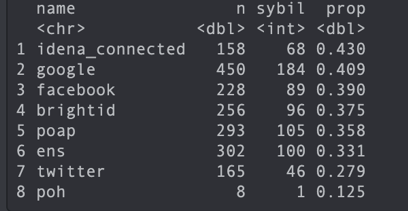

The procedures taken to convert these proportion to weights are as follows;

- Subtract all the proportion from 1 (1-prop): This helps up reverse the order of weights i.e After subtraction, POH will have the highest weight and Idena will have the lowest weight.
- Sum up all the values from (1-prop)
- Divide each value in 1-prop by the sum of (1-prop): This converts the reversed proportions to ratios that sums up to one and it gives an idea of how significant the weight of a verification method is, on a scale of 1.

In [157]:
weighting = pd.DataFrame()
weighting["Method"] = ["Idena", "Google", "Facebook", "Brightid", "POAP", "ens", "Twitter", "POH"]
weighting["Initial weights"] = [0.5, 0.15, 0.15, 0.5, 0.25, 0.25, 0.15, 0.5]
weighting["New weights"] = [0.107, 0.111, 0.115, 0.118, 0.121, 0.126, 0.136, 0.165]


A comparison of the initial and new weight is displayed as follows;

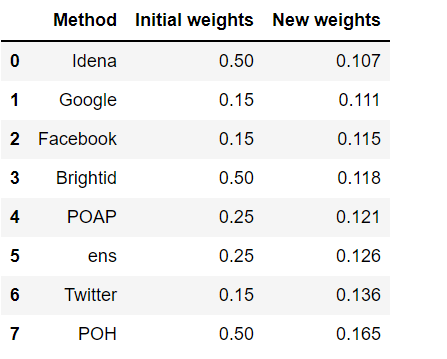

How do the initial weight and new weightings compare across the different verification methods?

- Idena had a very high initial weight of 0.5 but a final weight of 0.107
- Google has an unchanged ratio between the initial and the new weights because it's values are both amongst the least.
- Facebook has a slight change in it's weights, because it has the least weight in the initial weigths and it's new weight is just above the last 2 weights.
- Brightid has also has a very high change in weights from one of the highest weighted method to the fourth highest weighted method.
- POAP and ENS maintains the same range of positions in both the initial weight and the new weights.
- Twitter had a huge change in it weights moving from one of the least to the second highest weight.
- POH maintains it's position as the highest weighted method in both weighting systems.

What is the direct comparison between the initial weight and new weight? 

In [193]:
w_1 = []

for i in weighting["Initial weights"]:
    w_1.append(i/sum(weighting["Initial weights"], 2))

In [195]:
weighting["initial_ratio"] = [round(i,2) for i in w_1]

In [196]:
weighting

,Method,Initial weights,New weights,initial_ratio
0,Idena,0.50,0.107,0.11
1,Google,0.15,0.111,0.03
2,Facebook,0.15,0.115,0.03
3,Brightid,0.50,0.118,0.11
4,POAP,0.25,0.121,0.06
5,ens,0.25,0.126,0.06
6,Twitter,0.15,0.136,0.03
7,POH,0.50,0.165,0.11


The dataframe above compares the two weighting parameters having the same total ratio of 1. This helps us look at the direct comparison of both the impact of the weights on the total trust bonus score.

In [198]:
def calc_tb(df):
    """
    This function calculates the trust bonus score of each account based on the new trust bonus weighting parameter.
    """
    
    trust_scores = []
    for i in range(df.shape[0]):
        
        tb = 0.5
        
        if df.loc[i,"is_poh_verified"] == True:
            tb += 0.165
        if df.loc[i, "is_twitter_verified"] == True:
            tb += 0.136
        if df.loc[i, "is_ens_verified"] == True:
            tb += 0.126
        if df.loc[i, "is_poap_verified"] == True:
            tb += 0.121
        if df.loc[i, "is_brightid_verified"] == True:
            tb += 0.118
        if df.loc[i, "is_facebook_verified"] == True:
            tb += 0.115
        if df.loc[i, "is_google_verified"] == True:
            tb += 0.111
        if df.loc[i, "is_idena_verified"] == True:
            tb += 0.107
            
        if tb > 1.5:
            tb = 1.5
        trust_scores.append(tb)
    return trust_scores

Let's apply the function above to the dataset and have a list of trust bonus scores. 

The newly generated trust bonus scores are added to the dataframe as a new column ("new_weight").

In [163]:
data["new_weight"] = calc_tb(data)

We need to drop the accounts whose trust bonus scores are missing originally from the dataset. This can hinder us from calculating the mean and median trust bonus scores.

The process is implemented in the following line of code.

In [4]:
data.dropna(subset=["trust_bonus"], axis=0, inplace=True)

To have the variations between the trust bonus score for sybil and non sybil accounts, we are going to split the datasets based on the "Is Sybil? (T or F)" column and then calculate the mean and median values for both classes.

In the next cell of code, we will group these dataframe and compute the trust bonus scores using the new and old weighting parameters. Then, we will populate the data into a dataframe.

In [179]:
mean_sybil_old = data.groupby("Is Sybil? (T or F)")["trust_bonus"].mean()[1]
mean_non_sybil_old = data.groupby("Is Sybil? (T or F)")["trust_bonus"].mean()[0]

median_sybil_old = data.groupby("Is Sybil? (T or F)")["trust_bonus"].median()[1]
median_non_sybil_old = data.groupby("Is Sybil? (T or F)")["trust_bonus"].median()[0]

mean_sybil_new = data.groupby("Is Sybil? (T or F)")["new_weight"].mean()[1]
mean_non_sybil_new = data.groupby("Is Sybil? (T or F)")["new_weight"].mean()[0]

median_sybil_new = data.groupby("Is Sybil? (T or F)")["new_weight"].median()[1]
median_non_sybil_new = data.groupby("Is Sybil? (T or F)")["new_weight"].median()[0]

weight_comparision = pd.DataFrame()
weight_comparision["Weights"] = ["Initial", "New"]
weight_comparision["Sybil_mean"] = [mean_sybil_old, mean_sybil_new]
weight_comparision["Non_sybil_mean"] = [mean_non_sybil_old, mean_non_sybil_new]
weight_comparision["Mean differences"] = [mean_non_sybil_old - mean_sybil_old, mean_non_sybil_new - mean_sybil_new]
weight_comparision["Sybil_median"] = [median_sybil_old, median_sybil_new]
weight_comparision["Non_sybil_median"] = [median_non_sybil_old, median_non_sybil_new]
weight_comparision["Median differences"] = [median_non_sybil_old - median_sybil_old, median_non_sybil_new - median_sybil_new]

weight_comparision

,Weights,Sybil_mean,Non_sybil_mean,Mean differences,Sybil_median,Non_sybil_median,Median differences
0,Initial,0.885376,1.100503,0.215126,0.800,1.200,0.400
1,New,0.705925,0.826457,0.120532,0.621,0.858,0.237


The dataframe above shows the summary of the weighting parameters over different metrics. 

Weights: This column shows the weighting parameters used i.e New or initial (old) parameters.

Sybil_mean: This shows the average trust bonus score for the sybil accounts using both old and new weighting parameters.

Non_sybil_mean: This shows the average trust bonus score for the non sybil accounts based on the initial and new weighting 
parameters.

Mean difference: This shows the difference between the average trust_bonus scores for the sybil accounts and non sybil accounts using both the new and old weighting parameters.

Sybil_median: This shows the median trust bonus score for the sybil for the 2 weighting parameters.

Non_sybil_median: This shows the median trust bonus score for the non sybil accounts for both weighting parameters.

Median differences: This shows the differences between the median trust bonus score for the sybil and non sybil accounts for both weighting parameters.

#### Using the newly generated weighting parameter as a basis for generating random weights.

From the weighting parameters generated from the proportoins, we can just keep generating random values to have the pattern as the proportoins.

The weights below shows the newly generated weights and a few random values following the same pattern as the proportional weight.

In [22]:
my_weights = [[16.5, 13.6, 12.6, 12.1, 11.8, 11.5, 11.1, 10.7], [25, 20, 16, 16, 7, 6, 6, 4], 
             [19, 15, 14, 13, 13, 12, 12, 2], [18, 15, 14, 13, 12, 12, 10, 6], [26, 20, 18, 16, 7, 5, 5, 3]]

Let's apply the above weight to our dataframe. 

The function below generates the trust bonus score for the accounts in the dataframe using the list of weight inputted to the function. POH has the highest weight and Idena with the least weight as indicated in the weights generated from the proportions 

In [25]:
def calc_score(dfs, list_):
    
    dff = dfs.copy()
    
    scores = list_
    
    trust_scores.append([i for i in scores])
    
    total_score = []
    
    dff.is_brightid_verified = np.where(dff.is_brightid_verified == True, scores[4], 0)
    
    dff.is_twitter_verified = np.where(dff.is_twitter_verified == True, scores[1], 0)
    
    dff.is_google_verified = np.where(dff.is_google_verified == True, scores[6], 0)
    
    dff.is_facebook_verified = np.where(dff.is_facebook_verified == True, scores[5], 0)
    
    dff.is_poap_verified = np.where(dff.is_poap_verified == True, scores[3], 0)
    
    dff.is_ens_verified = np.where(dff.is_ens_verified == True, scores[2], 0)
    
    dff.is_poh_verified = np.where(dff.is_poh_verified == True, scores[0], 0)
    
    dff.is_idena_verified = np.where(dff.is_idena_verified == True, scores[7], 0)

    
    for row in range(dff.shape[0]):
        total_score.append(sum(dff.loc[row, ["is_brightid_verified", "is_twitter_verified", "is_poap_verified",
                             "is_ens_verified", "is_google_verified", 'is_facebook_verified', 'is_poh_verified', 'is_idena_verified']]))
    
    dff["total_score"] = total_score
    
    sybil_mean_ = dff.groupby("Is Sybil? (T or F)")["total_score"].mean()[1]
    not_sybil_mean_ = dff.groupby("Is Sybil? (T or F)")["total_score"].mean()[0]
    
    sybil_mean.append(sybil_mean_)
    not_sybil_mean.append(not_sybil_mean_)
    
    sybil_median_ = dff.groupby("Is Sybil? (T or F)")["total_score"].median()[1]
    not_sybil_median_ = dff.groupby("Is Sybil? (T or F)")["total_score"].median()[0]
    
    sybil_median.append(sybil_median_)
    not_sybil_median.append(not_sybil_median_)
    
    trust_median_differences.append(abs(sybil_median_ - not_sybil_median_))
    
    trust_mean_differences.append(abs(sybil_mean_ - not_sybil_mean_))

The function can be applied to the data now to generate results. 

We are going to use the list of weights defined above under the variable name "my_weight".

In [27]:
trust_scores = []

trust_mean_differences = []

trust_median_differences = []

sybil_mean = []

not_sybil_mean = []

sybil_median = []

not_sybil_median = []


import time
from datetime import datetime


start = datetime.now()
for i in range(len(my_weights)):
    calc_score(data, my_weights[i])
    
end = datetime.now()

print(end - start)

0:00:04.517277


The results from the above cell is converted into a dataframe for better understanding and communication.

In [28]:
df = pd.DataFrame()
df["Combination of weights"] = trust_scores
df["Sybil mean"] = sybil_mean
df["not_sybil mean"] = not_sybil_mean
df["Mean differences"] = trust_mean_differences
df["Sybil median"] = sybil_median
df["not_sybil median"] = not_sybil_median
df["Median differences"] = trust_median_differences

Let's display the results generated from the above computations. 

The column are identical to the previous displayed summary.

In [29]:
df

,Combination of weights,Sybil mean,not_sybil mean,Mean differences,Sybil median,not_sybil median,Median differences
0,"[16.5, 13.6, 12.6, 12.1, 11.8, 11.5, 11.1, 10.7]",20.421823,32.563910,12.142087,12.1,35.8,23.7
1,"[25, 20, 16, 16, 7, 6, 6, 4]",18.074586,30.939850,12.865264,12.0,32.0,20.0
2,"[19, 15, 14, 13, 13, 12, 12, 2]",22.104972,35.413534,13.308561,13.0,39.0,26.0
3,"[18, 15, 14, 13, 12, 12, 10, 6]",20.842541,33.661654,12.819113,13.0,37.0,24.0
4,"[26, 20, 18, 16, 7, 5, 5, 3]",17.870166,30.954887,13.084721,10.0,33.0,23.0


Let's make a visual comparision and exploration of the results displayed above.

We are going to use the sort the results using the sybil mean column in a descending order.

In [212]:
import matplotlib.pyplot as plt
ordered_df = df.sort_values(by='Sybil mean', ascending=False)
my_range=range(1,len(df.index)+1)

The lines of code below produces a dumbbell chart of mean trust bonus score for sybil and non sybil accounts using different weights.

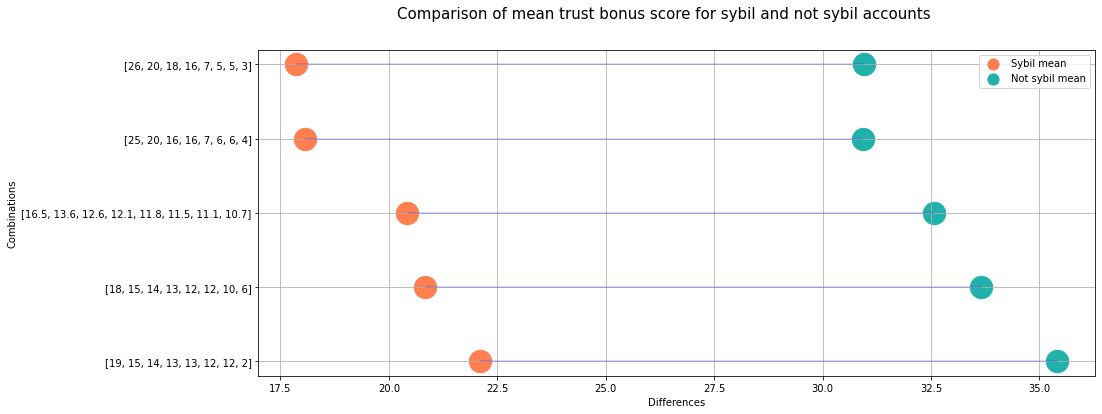

In [236]:
import matplotlib.pyplot as plt
ordered_df = df.sort_values(by='Sybil mean', ascending=False)
my_range=range(1,len(df.index)+1)

plt.figure(figsize=(15, 6))
plt.hlines(y=my_range, xmin=ordered_df['Sybil mean'], xmax=ordered_df['not_sybil mean'], color='blue', alpha=0.2, )
plt.scatter(ordered_df['Sybil mean'], my_range, color='coral', alpha=1, label='Sybil mean', s=500)
plt.scatter(ordered_df['not_sybil mean'], my_range, color='lightseagreen', alpha=1 , label='Not sybil mean', s=500)
plt.legend()

# Add title and axis names
plt.yticks(my_range, ordered_df['Combination of weights'])
plt.suptitle("Comparison of mean trust bonus score for sybil and not sybil accounts", fontsize=15)
plt.xlabel('Differences')
plt.ylabel('Combinations')
plt.grid()
plt.legend(loc="upper right", markerscale=0.5)

plt.show()

The cell of code below produces the median score for sybil and non sybil accounts using the various randomly generated weights

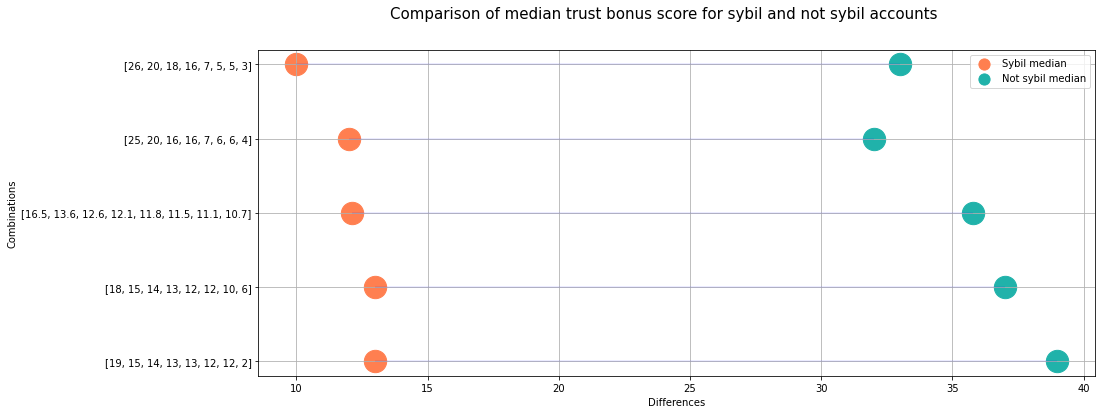

In [232]:
import matplotlib.pyplot as plt
ordered_df = df.sort_values(by='Sybil median', ascending=False)
my_range=range(1,len(df.index)+1)

plt.figure(figsize=(15, 6))
plt.hlines(y=my_range, xmin=ordered_df['Sybil median'], xmax=ordered_df['not_sybil median'], color='blue', alpha=0.1, )
plt.scatter(ordered_df['Sybil median'], my_range, color='coral', alpha=1, label='Sybil median', s=500)
plt.scatter(ordered_df['not_sybil median'], my_range, color='lightseagreen', alpha=1 , label='Not sybil median', s=500)
plt.legend()

# Add title and axis names
plt.yticks(my_range, ordered_df['Combination of weights'])
plt.suptitle("Comparison of median trust bonus score for sybil and not sybil accounts", fontsize=15)
plt.xlabel('Differences')
plt.ylabel('Combinations')
plt.grid()
plt.legend(loc="upper right", markerscale=0.5)

plt.show()

The plots above shows the mean and median trust bonus scores for sybil or non sybil accounts using various weights

Let's make a comparision of the mean and median differences in a more obvious chart.

In [32]:
import plotly.express as px

combination = []
for i in range(df.shape[0]):
    string = " , ".join([str(item) for item in df.loc[i, "Combination of weights"]])
    combination.append(string)
    
df["Weight_combination"] = combination

barchart = px.bar(data_frame= df,
                 y= "Weight_combination",
                 x= [df["Mean differences"], df["Median differences"]],
                 #color="counts",
                 opacity=0.9,
                 orientation="h",
                  color_continuous_scale=px.colors.diverging.Spectral,
                  barmode="group",
                  title="Plot of Mean and median differences of weights for each verification method",
                 ) 

#barchart.update_layout(yaxis = dict(tickmode = 'array', ticktext = [i for i in diff["Combination of weights"]]))

The chart created by the cell of code above is displayed below;

In [33]:
barchart

The combination "26, 20, 18, 16, 7, 5, 5, 3" has the most mean differences between the trust bonus score for sybil and not sybil accounts, also the combination "19, 15, 14, 13, 13, 12, 12, 2" has the highest median difference between the trust bonus score for sybil and non sybil accounts.

Weights are combined according to this arrangement of platforms: POH, Twitter, ENS, POAP, BrightID, Facebook, Google, Idena

#### Generating more random values

Let's repeat the above steps for more random combinations, such that the random numbers still preserve the order gotten from the proportions above

To start with, we need a function to generate random values whose sum is less than or equal to 200 and are factors of 5.

The function belows performs this task.

In [36]:
## This function also samples random integers from a range of values
## Then computes the sum to assert it is 100.
## Then returns the pick... This could take very long.
import random
def get_scores(n):
    x = 200
    while True:
        pick = random.sample([i for i in range(5, 65, 5)], n)
        if sum(pick) <= x:
            #break
            return pick

Using the function defined above, let's generate a list of 100 random values, such that each weight is unique.

In [75]:
values = []
for i in range(100):
    np.random.seed(i)
    values.append(np.sort(get_scores(8)))

In [77]:
#values2 = pd.Series([str(i) for i in values if i not in uni]).unique()

The cell of code below makes sure there is no random combination is repeated.

In [241]:
## The block of code below combines all the element in a list and makes them a string for each comparision.
combination_values = []
for i in range(len(values)):
    string = " _ ".join([str(item) for item in values[i]])
    combination_values.append(string)
    
## The line of code below compares all the combined weights to make sure that there is no duplicates.
uni = []
[uni.append(i) for i in combination_values if i not in uni]

## The combined weights are inputed to a dataframe
dd = pd.DataFrame()
dd["list"] = list(values)
dd["combine_values"] = combination_values

## Dropping any duplicates and getting the index of the non_duplicated values
indexes = dd["combine_values"].drop_duplicates().index

## Inputting the combinations without duplicates into a new dataframe
df2 = dd.loc[indexes, :]

## Resetting the index in the dataframe
df2.reset_index(drop=True, inplace=True)

Let's calculate the trust bonus score, mean trust bonus score, median trust bonus score using the randomly generated weights.

The function below helps with that and returns the values as needed.

In [54]:
def calc_score_patterns(dfs, list_):
    
    dff = dfs.copy()
    
    scores = list_
    
    trust_scores.append([i for i in scores])
    
    total_score = []
    
    dff.is_brightid_verified = np.where(dff.is_brightid_verified == True, scores[2], 0)
    
    dff.is_twitter_verified = np.where(dff.is_twitter_verified == True, scores[6], 0)
    
    dff.is_google_verified = np.where(dff.is_google_verified == True, scores[1], 0)
    
    dff.is_facebook_verified = np.where(dff.is_facebook_verified == True, scores[3], 0)
    
    dff.is_poap_verified = np.where(dff.is_poap_verified == True, scores[4], 0)
    
    dff.is_ens_verified = np.where(dff.is_ens_verified == True, scores[5], 0)
    
    dff.is_poh_verified = np.where(dff.is_poh_verified == True, scores[7], 0)
    
    dff.is_idena_verified = np.where(dff.is_idena_verified == True, scores[0], 0)

    
    for row in range(dff.shape[0]):
        total_score.append(sum(dff.loc[row, ["is_brightid_verified", "is_twitter_verified", "is_poap_verified",
                             "is_ens_verified", "is_google_verified", 'is_facebook_verified', 'is_poh_verified', 'is_idena_verified']]))
    
    dff["total_score"] = total_score
    
    sybil_mean_ = dff.groupby("Is Sybil? (T or F)")["total_score"].mean()[1]
    not_sybil_mean_ = dff.groupby("Is Sybil? (T or F)")["total_score"].mean()[0]
    
    sybil_mean.append(sybil_mean_)
    not_sybil_mean.append(not_sybil_mean_)
    
    sybil_median_ = dff.groupby("Is Sybil? (T or F)")["total_score"].median()[1]
    not_sybil_median_ = dff.groupby("Is Sybil? (T or F)")["total_score"].median()[0]
    
    sybil_median.append(sybil_median_)
    not_sybil_median.append(not_sybil_median_)
    
    trust_median_differences.append(abs(sybil_median_ - not_sybil_median_))
    
    trust_mean_differences.append(abs(sybil_mean_ - not_sybil_mean_))

The cell of code below loops through the lenght of the generated list and return the outputs as needed for each iteration.

In [102]:
trust_scores = []

trust_mean_differences = []

trust_median_differences = []

sybil_mean = []

not_sybil_mean = []

sybil_median = []

not_sybil_median = []


import time
from datetime import datetime


start = datetime.now()
for i in range(len(df2.list)):
    calc_score_patterns(data, df2.list[i])
    
end = datetime.now()

print(end - start)

0:00:09.640551


The cell of code below inputes the results into a dataframe.

In [103]:
df1 = pd.DataFrame()
df1["Combination of weights"] = trust_scores
df1["Sybil mean"] = sybil_mean
df1["not_sybil mean"] = not_sybil_mean
df1["Mean differences"] = trust_mean_differences
df1["Sybil median"] = sybil_median
df1["not_sybil median"] = not_sybil_median
df1["Median differences"] = trust_median_differences
df1.sort_values(by="Mean differences", ascending=False)

This line of code sorts the data generated by the mean differences in a descending order.

In [104]:
df1.sort_values(by="Mean differences", ascending=False)

,Combination of weights,Sybil mean,not_sybil mean,Mean differences,Sybil median,not_sybil median,Median differences
2,"[5, 10, 15, 20, 30, 35, 40, 45]",37.582873,64.223058,26.640185,25,70,45
0,"[5, 10, 15, 20, 25, 35, 40, 50]",36.146409,61.954887,25.808478,25,70,45
8,"[5, 10, 15, 20, 25, 35, 40, 45]",36.132597,61.867168,25.734571,25,70,45
6,"[5, 10, 15, 20, 25, 30, 45, 50]",35.400552,60.914787,25.514234,25,65,40
5,"[5, 10, 15, 20, 25, 30, 40, 55]",34.779006,59.511278,24.732273,25,65,40
7,"[5, 10, 15, 20, 25, 30, 40, 50]",34.765193,59.423559,24.658366,25,65,40
3,"[5, 10, 15, 20, 25, 30, 40, 45]",34.751381,59.335840,24.584458,25,65,40
10,"[5, 10, 15, 20, 25, 30, 35, 60]",34.157459,58.107769,23.950311,25,65,40
4,"[5, 10, 15, 20, 25, 30, 35, 55]",34.143646,58.020050,23.876404,25,65,40
11,"[5, 10, 15, 20, 25, 30, 35, 50]",34.129834,57.932331,23.802497,25,65,40


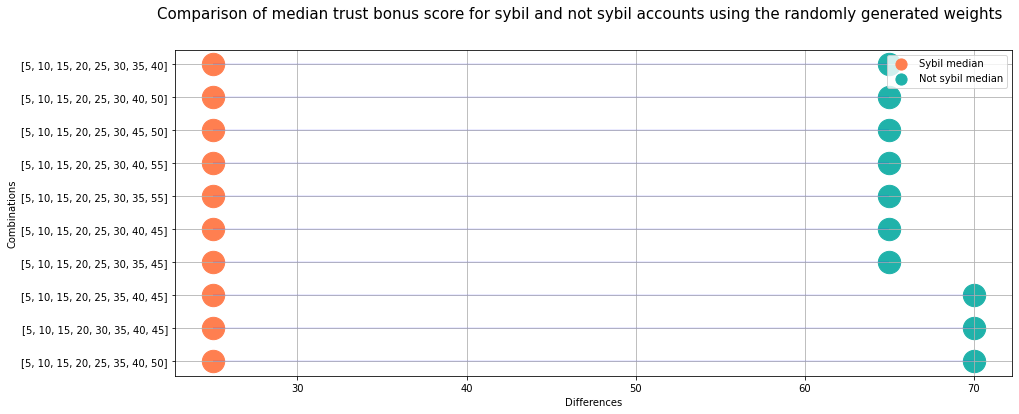

In [243]:
import matplotlib.pyplot as plt
ordered_df = df1.sort_values(by=['Median differences','Sybil median'], ascending=False).head(10)
my_range=range(1,len(ordered_df.index)+1)

plt.figure(figsize=(15, 6))
plt.hlines(y=my_range, xmin=ordered_df['Sybil median'], xmax=ordered_df['not_sybil median'], color='blue', alpha=0.1, )
plt.scatter(ordered_df['Sybil median'], my_range, color='coral', alpha=1, label='Sybil median', s=500)
plt.scatter(ordered_df['not_sybil median'], my_range, color='lightseagreen', alpha=1 , label='Not sybil median', s=500)
plt.legend()

# Add title and axis names
plt.yticks(my_range, ordered_df['Combination of weights'])
plt.suptitle("Comparison of median trust bonus score for sybil and not sybil accounts using the randomly generated weights", fontsize=15)
plt.xlabel('Differences')
plt.ylabel('Combinations')
plt.grid()
plt.legend(loc="upper right", markerscale=0.5)

plt.show()

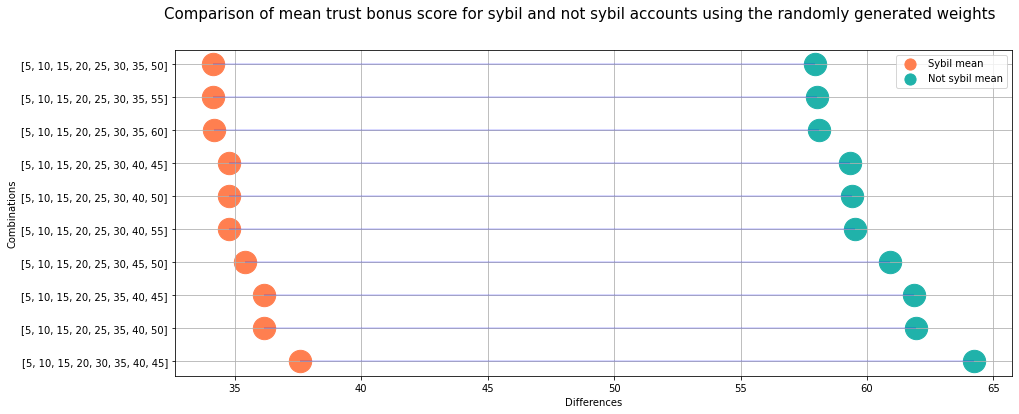

In [247]:
import matplotlib.pyplot as plt
ordered_df = df1.sort_values(by=['Mean differences', 'Sybil mean'], ascending=False).head(10)
my_range=range(1,len(ordered_df.index)+1)

plt.figure(figsize=(15, 6))
plt.hlines(y=my_range, xmin=ordered_df['Sybil mean'], xmax=ordered_df['not_sybil mean'], color='blue', alpha=0.2, )
plt.scatter(ordered_df['Sybil mean'], my_range, color='coral', alpha=1, label='Sybil mean', s=500)
plt.scatter(ordered_df['not_sybil mean'], my_range, color='lightseagreen', alpha=1 , label='Not sybil mean', s=500)
plt.legend()

# Add title and axis names
plt.yticks(my_range, ordered_df['Combination of weights'])
plt.suptitle("Comparison of mean trust bonus score for sybil and not sybil accounts using the randomly generated weights", fontsize=15)
plt.xlabel('Differences')
plt.ylabel('Combinations')
plt.grid()
plt.legend(loc="upper right", markerscale=0.5)

plt.show()

The plots above shows the mean and median trust bonus score for both the sybil and not sybil accounts for each randomly generated weight combinations following the pattern derived from the proportions.

A comparison of both the median and mean score is displayed below. 

In [133]:
import plotly.express as px

combination = []
for i in range(df1.shape[0]):
    string = " , ".join([str(item) for item in df1.loc[i, "Combination of weights"]])
    combination.append(string)
    
df1["Weight_combination"] = combination

barchart = px.bar(data_frame= df1,
                 y= "Weight_combination",
                 x= [df1["Mean differences"], df1["Median differences"]],
                 #color="counts",
                 opacity=0.9,
                 orientation="h",
                  color_continuous_scale=px.colors.diverging.Spectral,
                  barmode="group",
                  title="Plot of Mean and median differences of weights for each verification method (No repetiton in weights)",
                  labels={"variable": "Class",
                         "x": "Methods", 
                         "true_counts": "True",
                         "false_counts": "False"}
                  #text= verify.counts_True, verify.counts_False
                 #color_discrete_sequence=["darkorange", "lightblue"]
                 ) 

#barchart.update_layout(yaxis = dict(tickmode = 'array', ticktext = [i for i in diff["Combination of weights"]]))
barchart.show()

Let's try to create a set of random numbers (weights) that can be repeated to see if there is an improvement on the variations in trust bonus score of the two classes.

The cell of code computes a list of numbers between 5 and 65 twice then join them together, this leaves us with a list of numbers between 5 and 65 with two occurence. 

In [ ]:
number1 = [i for i in range(5, 65, 5)]

number2 = [i for i in range(5, 65, 5)]

number1.extend(number2)

The cell of code below computes the list of random numbers from which can be repeated but still follows the same pattern.

In [123]:
values = []
for i in range(10):
    while i < 10:
        rand = random.sample(number1, 8)
        if np.sum(rand) <= 200:
            values.append(np.sort(rand))
            i+=1

In [124]:
values

[array([ 5, 10, 15, 20, 25, 35, 40, 50]),
 array([ 5, 10, 15, 20, 25, 30, 35, 45]),
 array([ 5, 10, 15, 20, 30, 35, 40, 45]),
 array([ 5, 10, 15, 20, 25, 30, 40, 45]),
 array([ 5, 10, 15, 20, 25, 30, 35, 55]),
 array([ 5, 10, 15, 20, 25, 30, 40, 45]),
 array([ 5, 10, 15, 20, 25, 30, 40, 55]),
 array([ 5, 10, 15, 20, 25, 35, 40, 50]),
 array([ 5, 10, 15, 20, 25, 30, 45, 50]),
 array([ 5, 10, 15, 20, 25, 35, 40, 50]),
 array([ 5, 10, 15, 20, 25, 30, 40, 50]),
 array([ 5, 10, 15, 20, 25, 30, 45, 50]),
 array([ 5, 10, 15, 20, 25, 35, 40, 45]),
 array([ 5, 10, 15, 20, 25, 30, 35, 55]),
 array([ 5, 10, 15, 20, 25, 30, 35, 40]),
 array([ 5, 10, 15, 20, 25, 30, 40, 55]),
 array([ 5, 10, 15, 20, 25, 30, 35, 45]),
 array([ 5, 10, 15, 20, 25, 30, 45, 50]),
 array([ 5, 10, 15, 20, 25, 35, 40, 45]),
 array([ 5, 10, 15, 20, 25, 30, 40, 50]),
 array([ 5, 10, 15, 20, 25, 35, 40, 50]),
 array([ 5, 10, 15, 20, 30, 35, 40, 45]),
 array([ 5, 10, 15, 20, 25, 30, 35, 60]),
 array([ 5, 10, 15, 20, 25, 30, 40

This cell of code computes as before makes sure there is no repetition between the values.

In [125]:
combination_values = []
for i in range(len(values)):
    string = " _ ".join([str(item) for item in values[i]])
    combination_values.append(string)
    
uni = []
[uni.append(i) for i in combination_values if i not in uni]

dd = pd.DataFrame()

dd["list"] = list(values)
dd["combine_values"] = combination_values

indexes = dd["combine_values"].drop_duplicates().index

df2 = dd.loc[indexes, :]

df2.reset_index(drop=True, inplace=True)

In [128]:
df2.head(50)

,list,combine_values
0,"[5, 10, 15, 20, 25, 35, 40, 50]",5 _ 10 _ 15 _ 20 _ 25 _ 35 _ 40 _ 50
1,"[5, 10, 15, 20, 25, 30, 35, 45]",5 _ 10 _ 15 _ 20 _ 25 _ 30 _ 35 _ 45
2,"[5, 10, 15, 20, 30, 35, 40, 45]",5 _ 10 _ 15 _ 20 _ 30 _ 35 _ 40 _ 45
3,"[5, 10, 15, 20, 25, 30, 40, 45]",5 _ 10 _ 15 _ 20 _ 25 _ 30 _ 40 _ 45
4,"[5, 10, 15, 20, 25, 30, 35, 55]",5 _ 10 _ 15 _ 20 _ 25 _ 30 _ 35 _ 55
5,"[5, 10, 15, 20, 25, 30, 40, 55]",5 _ 10 _ 15 _ 20 _ 25 _ 30 _ 40 _ 55
6,"[5, 10, 15, 20, 25, 30, 45, 50]",5 _ 10 _ 15 _ 20 _ 25 _ 30 _ 45 _ 50
7,"[5, 10, 15, 20, 25, 30, 40, 50]",5 _ 10 _ 15 _ 20 _ 25 _ 30 _ 40 _ 50
8,"[5, 10, 15, 20, 25, 35, 40, 45]",5 _ 10 _ 15 _ 20 _ 25 _ 35 _ 40 _ 45
9,"[5, 10, 15, 20, 25, 30, 35, 40]",5 _ 10 _ 15 _ 20 _ 25 _ 30 _ 35 _ 40


The cell of code below computes the results for a list of combinations available.

In [129]:
trust_scores = []

trust_mean_differences = []

trust_median_differences = []

sybil_mean = []

not_sybil_mean = []

sybil_median = []

not_sybil_median = []


import time
from datetime import datetime


start = datetime.now()
for i in range(len(df2.list)):
    calc_score_patterns(data, df2.list[i])
    
end = datetime.now()

print(end - start)

0:00:30.042901


The cell below converts the generated results into a dataframe

In [130]:
df3 = pd.DataFrame()
df3["Combination of weights"] = trust_scores
df3["Sybil mean"] = sybil_mean
df3["not_sybil mean"] = not_sybil_mean
df3["Mean differences"] = trust_mean_differences
df3["Sybil median"] = sybil_median
df3["not_sybil median"] = not_sybil_median
df3["Median differences"] = trust_median_differences
df3.sort_values(by="Mean differences", ascending=False)

,Combination of weights,Sybil mean,not_sybil mean,Mean differences,Sybil median,not_sybil median,Median differences
37,"[5, 10, 10, 15, 30, 40, 40, 50]",36.422652,63.095238,26.672586,20,65,45
2,"[5, 10, 15, 20, 30, 35, 40, 45]",37.582873,64.223058,26.640185,25,70,45
19,"[5, 5, 15, 20, 20, 35, 50, 50]",33.425414,59.248120,25.822706,20,60,40
0,"[5, 10, 15, 20, 25, 35, 40, 50]",36.146409,61.954887,25.808478,25,70,45
8,"[5, 10, 15, 20, 25, 35, 40, 45]",36.132597,61.867168,25.734571,25,70,45
...,...,...,...,...,...,...,...
12,"[5, 10, 10, 15, 20, 25, 25, 55]",27.486188,46.403509,18.917321,20,50,30
17,"[5, 5, 10, 10, 15, 20, 40, 50]",22.776243,40.827068,18.050825,15,40,25
57,"[5, 5, 10, 15, 15, 20, 35, 60]",23.397790,41.253133,17.855343,15,40,25
63,"[5, 5, 15, 15, 20, 20, 25, 30]",24.820442,42.105263,17.284821,20,45,25


The cell below sorts the dataframe from above in descending order using the mean differences.

In [134]:
df3.sort_values(by="Mean differences", ascending=False, inplace=True)

In [145]:
df4 = df3.head(10)

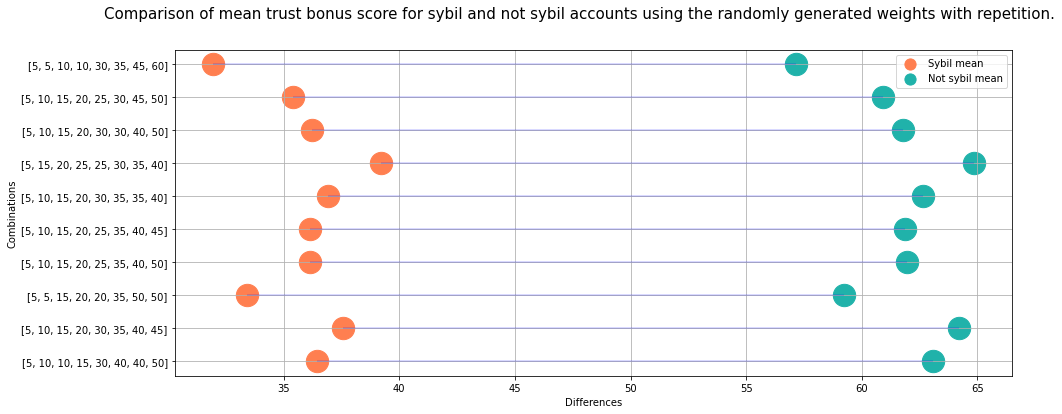

In [248]:
import matplotlib.pyplot as plt
ordered_df = df4.sort_values(by=['Mean differences', 'Sybil mean'], ascending=False).head(10)
my_range=range(1,len(ordered_df.index)+1)

plt.figure(figsize=(15, 6))
plt.hlines(y=my_range, xmin=ordered_df['Sybil mean'], xmax=ordered_df['not_sybil mean'], color='blue', alpha=0.2, )
plt.scatter(ordered_df['Sybil mean'], my_range, color='coral', alpha=1, label='Sybil mean', s=500)
plt.scatter(ordered_df['not_sybil mean'], my_range, color='lightseagreen', alpha=1 , label='Not sybil mean', s=500)
plt.legend()

# Add title and axis names
plt.yticks(my_range, ordered_df['Combination of weights'])
plt.suptitle("Comparison of mean trust bonus score for sybil and not sybil accounts using the randomly generated weights with repetition.", fontsize=15)
plt.xlabel('Differences')
plt.ylabel('Combinations')
plt.grid()
plt.legend(loc="upper right", markerscale=0.5)

plt.show()

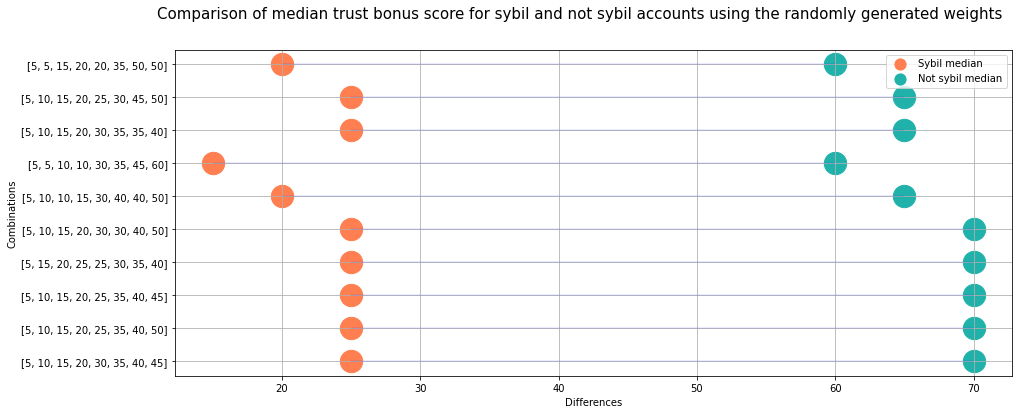

In [249]:
import matplotlib.pyplot as plt
ordered_df = df4.sort_values(by=['Median differences','Sybil median'], ascending=False).head(10)
my_range=range(1,len(ordered_df.index)+1)

plt.figure(figsize=(15, 6))
plt.hlines(y=my_range, xmin=ordered_df['Sybil median'], xmax=ordered_df['not_sybil median'], color='blue', alpha=0.1, )
plt.scatter(ordered_df['Sybil median'], my_range, color='coral', alpha=1, label='Sybil median', s=500)
plt.scatter(ordered_df['not_sybil median'], my_range, color='lightseagreen', alpha=1 , label='Not sybil median', s=500)
plt.legend()

# Add title and axis names
plt.yticks(my_range, ordered_df['Combination of weights'])
plt.suptitle("Comparison of median trust bonus score for sybil and not sybil accounts using the randomly generated weights", fontsize=15)
plt.xlabel('Differences')
plt.ylabel('Combinations')
plt.grid()
plt.legend(loc="upper right", markerscale=0.5)

plt.show()

The plots above shows the top 10 combinations that maximizes the difference between the mean and  median trust bonus scores using the randomly generated patterns.

Compare both the median and mean differences with just a plot.

In [148]:
import plotly.express as px

combination = []
for i in range(df4.shape[0]):
    string = " , ".join([str(item) for item in df4.loc[i, "Combination of weights"]])
    combination.append(string)
    
df4["Weight_combination"] = combination

barchart = px.bar(data_frame= df4,
                 y= "Weight_combination",
                 x= [df4["Mean differences"], df4["Median differences"]],
                 #color="counts",
                 opacity=0.9,
                 orientation="h",
                  color_continuous_scale=px.colors.diverging.Spectral,
                  barmode="group",
                  title="Plot of Mean and median differences of weights for each verification method (Repetition in weights)",
                  labels={"variable": "Class",
                         "x": "Methods", 
                         "true_counts": "True",
                         "false_counts": "False"}
                  #text= verify.counts_True, verify.counts_False
                 #color_discrete_sequence=["darkorange", "lightblue"]
                 ) 

#barchart.update_layout(loff"))

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [149]:
barchart

Dropping an unwanted column used for just the plot.

In [139]:
df3.drop("Weight_combination", axis=1, inplace=True)

In [140]:
df3.reset_index(drop=True, inplace=True)

In [141]:
df3.head(10)

,Combination of weights,Sybil mean,not_sybil mean,Mean differences,Sybil median,not_sybil median,Median differences
0,"[5, 10, 10, 15, 30, 40, 40, 50]",36.422652,63.095238,26.672586,20,65,45
1,"[5, 10, 15, 20, 30, 35, 40, 45]",37.582873,64.223058,26.640185,25,70,45
2,"[5, 5, 15, 20, 20, 35, 50, 50]",33.425414,59.248120,25.822706,20,60,40
3,"[5, 10, 15, 20, 25, 35, 40, 50]",36.146409,61.954887,25.808478,25,70,45
4,"[5, 10, 15, 20, 25, 35, 40, 45]",36.132597,61.867168,25.734571,25,70,45
5,"[5, 10, 15, 20, 30, 35, 35, 40]",36.933702,62.644110,25.710409,25,65,40
6,"[5, 15, 20, 25, 25, 30, 35, 40]",39.198895,64.837093,25.638198,25,70,45
7,"[5, 10, 15, 20, 30, 30, 40, 50]",36.215470,61.779449,25.563979,25,70,45
8,"[5, 10, 15, 20, 25, 30, 45, 50]",35.400552,60.914787,25.514234,25,65,40
9,"[5, 5, 10, 10, 30, 35, 45, 60]",31.933702,57.155388,25.221687,15,60,45


Indexes representing each method is as below.

In [154]:
methods_no_duniter = ["Idena", "Google", "Facebook", "Brightid", "POAP", "ENS", "Twitter", "POH"]

Num_no_duniter = [i for i in range(8)]

ref_2 = pd.DataFrame()
ref_2["Methods"] = methods_no_duniter
ref_2["Weights_index"] = Num_no_duniter

In [155]:
ref_2

,Methods,Weights_index
0,Idena,0
1,Google,1
2,Facebook,2
3,Brightid,3
4,POAP,4
5,ENS,5
6,Twitter,6
7,POH,7


Using the proportions, POH had the highest weight so the highest weight in the list is assigned to it and the least weight is assigned to Idena.

The dataframe below contains the initial weights, the new weights and the best randomized weights. We converted the best weights from a list of [5, 10, 10, 15, 30, 40, 40, 50] to [0.05, 0.10, 0.10, 0.15, 0.30, 0.40, 0.40, 0.50] for easy comparision. Now using this new parameters the mean difference will be 0.2667 as against the initial 21.5, also the median difference is now 0.45 as against the 0.40.

In [251]:
weighting = pd.DataFrame()
weighting["Method"] = ["Idena", "Google", "Facebook", "Brightid", "POAP", "ens", "Twitter", "POH"]
weighting["Initial weights"] = [0.5, 0.15, 0.15, 0.5, 0.25, 0.25, 0.15, 0.5]
weighting["New weights"] = [0.107, 0.111, 0.115, 0.118, 0.121, 0.126, 0.136, 0.165]
weighting["Best weights"] = [0.05, 0.10, 0.10, 0.15, 0.30, 0.40, 0.40, 0.50]
weighting

,Method,Initial weights,New weights,Best weights
0,Idena,0.50,0.107,0.05
1,Google,0.15,0.111,0.10
2,Facebook,0.15,0.115,0.10
3,Brightid,0.50,0.118,0.15
4,POAP,0.25,0.121,0.30
5,ens,0.25,0.126,0.40
6,Twitter,0.15,0.136,0.40
7,POH,0.50,0.165,0.50


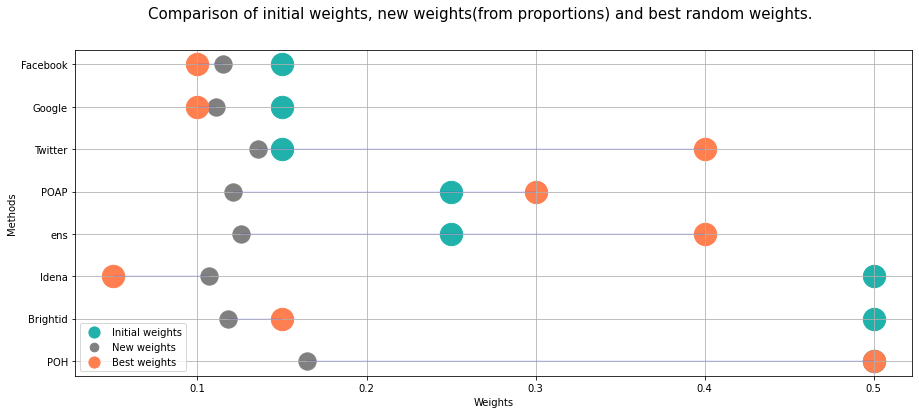

In [270]:
import matplotlib.pyplot as plt
ordered_df = weighting.sort_values(by=["Initial weights", "Best weights"], ascending=False)
my_range=range(1,len(ordered_df.index)+1)

plt.figure(figsize=(15, 6))
plt.hlines(y=my_range, xmin=ordered_df['New weights'], xmax=ordered_df['Best weights'], color='blue', alpha=0.1)
plt.scatter(ordered_df['Initial weights'], my_range, color='lightseagreen', alpha=1, label='Initial weights', s=500)
plt.scatter(ordered_df['New weights'], my_range, color='grey', alpha=1, label='New weights', s=300)
plt.scatter(ordered_df['Best weights'], my_range, color='coral', alpha= 1, label='Best weights', s=500)
plt.legend()

# Add title and axis names
plt.yticks(my_range, ordered_df['Method'])
plt.suptitle("Comparison of initial weights, new weights(from proportions) and best random weights.", fontsize=15)
plt.xlabel('Weights')
plt.ylabel('Methods')
plt.grid()
plt.legend(loc="lower left", markerscale=0.5)

plt.show()

Note: The initial weight of POH is not seen in the graph above because it overlaps with the best weight of 0.5.

In [271]:
df5_weights = [[0.05, 0.10, 0.10, 0.15, 0.30, 0.40, 0.40, 0.50], [0.5, 0.15, 0.15, 0.5, 0.25, 0.25, 0.15, 0.5],
       [0.107, 0.111, 0.115, 0.118, 0.121, 0.126, 0.136, 0.165]]

In [274]:
data.reset_index(drop=True, inplace=True)

In [275]:
trust_scores = []

trust_mean_differences = []

trust_median_differences = []

sybil_mean = []

not_sybil_mean = []

sybil_median = []

not_sybil_median = []


import time
from datetime import datetime


start = datetime.now()
for i in range(len(df5_weights)):
    calc_score_patterns(data, df5_weights[i])
    
end = datetime.now()

print(end - start)

0:00:04.238081


In [276]:
df5 = pd.DataFrame()
df5["Combination of weights"] = trust_scores
df5["Sybil mean"] = sybil_mean
df5["not_sybil mean"] = not_sybil_mean
df5["Mean differences"] = trust_mean_differences
df5["Sybil median"] = sybil_median
df5["not_sybil median"] = not_sybil_median
df5["Median differences"] = trust_median_differences
df5.sort_values(by="Mean differences", ascending=False)

,Combination of weights,Sybil mean,not_sybil mean,Mean differences,Sybil median,not_sybil median,Median differences
0,"[0.05, 0.1, 0.1, 0.15, 0.3, 0.4, 0.4, 0.5]",0.367270,0.632538,0.265267,0.200,0.650,0.450
1,"[0.5, 0.15, 0.15, 0.5, 0.25, 0.25, 0.15, 0.5]",0.407103,0.633794,0.226691,0.250,0.650,0.400
2,"[0.107, 0.111, 0.115, 0.118, 0.121, 0.126, 0.1...",0.205866,0.326299,0.120433,0.121,0.358,0.237


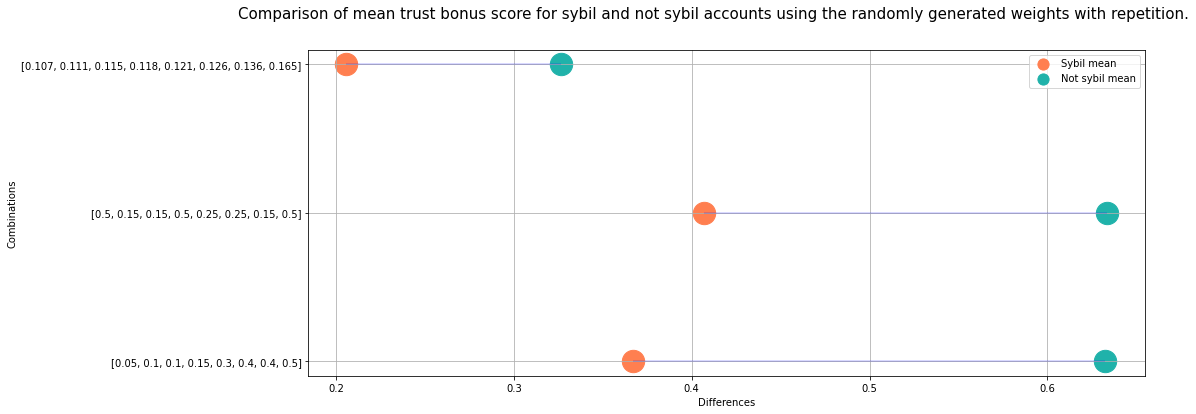

In [277]:
ordered_df = df5.sort_values(by=['Mean differences', 'Sybil mean'], ascending=False).head(10)
my_range=range(1,len(ordered_df.index)+1)

plt.figure(figsize=(15, 6))
plt.hlines(y=my_range, xmin=ordered_df['Sybil mean'], xmax=ordered_df['not_sybil mean'], color='blue', alpha=0.2, )
plt.scatter(ordered_df['Sybil mean'], my_range, color='coral', alpha=1, label='Sybil mean', s=500)
plt.scatter(ordered_df['not_sybil mean'], my_range, color='lightseagreen', alpha=1 , label='Not sybil mean', s=500)
plt.legend()

# Add title and axis names
plt.yticks(my_range, ordered_df['Combination of weights'])
plt.suptitle("Comparison of mean trust bonus score for sybil and not sybil accounts using the randomly generated weights with repetition.", fontsize=15)
plt.xlabel('Differences')
plt.ylabel('Combinations')
plt.grid()
plt.legend(loc="upper right", markerscale=0.5)

plt.show()

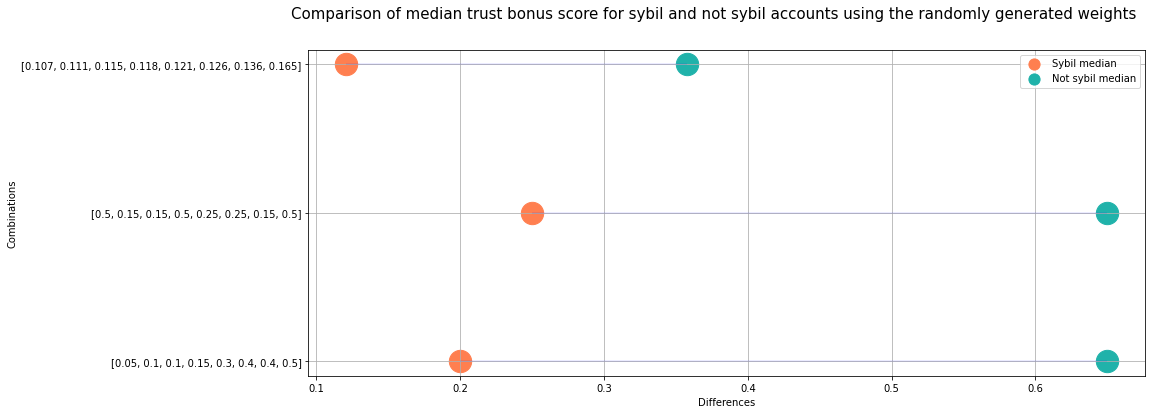

In [278]:
import matplotlib.pyplot as plt
ordered_df = df5.sort_values(by=['Median differences','Sybil median'], ascending=False).head(10)
my_range=range(1,len(ordered_df.index)+1)

plt.figure(figsize=(15, 6))
plt.hlines(y=my_range, xmin=ordered_df['Sybil median'], xmax=ordered_df['not_sybil median'], color='blue', alpha=0.1, )
plt.scatter(ordered_df['Sybil median'], my_range, color='coral', alpha=1, label='Sybil median', s=500)
plt.scatter(ordered_df['not_sybil median'], my_range, color='lightseagreen', alpha=1 , label='Not sybil median', s=500)
plt.legend()

# Add title and axis names
plt.yticks(my_range, ordered_df['Combination of weights'])
plt.suptitle("Comparison of median trust bonus score for sybil and not sybil accounts using the randomly generated weights", fontsize=15)
plt.xlabel('Differences')
plt.ylabel('Combinations')
plt.grid()
plt.legend(loc="upper right", markerscale=0.5)

plt.show()

From the approaches taken above, improvement had been made on the variations in the mean and median trust bonus score for sybil accounts using the pattern from the proportions of sybil accounts verified from each method. We were able to get a mean difference of 26.67 and median difference of 45. Better results can be derived by increasing the number of iteration of the random values, these can lead to better results and the team can intuitively look at the random values and derive new pattern or adjust the generated values for better results.

In [169]:
weight_6= [[0.5, 0.15, 0.25, 0.25, 0.15, 0.15, 0.50, 0.50], [0.45, 0.15, 0.15, 0.25, 0.05, 0.01, 0.30, 0.50],
         [0.43, 0.36, 0.36, 0.58, 0.36, 0.00, 0.36, 0.00]]

In [170]:
def calc_score_patterns(dfs, list_):
    
    dff = dfs.copy()
    
    scores = list_
    
    trust_scores.append([i for i in scores])
    
    total_score = []
    
    dff.is_brightid_verified = np.where(dff.is_brightid_verified == True, scores[0], 0)
    
    dff.is_twitter_verified = np.where(dff.is_twitter_verified == True, scores[1], 0)
    
    dff.is_google_verified = np.where(dff.is_google_verified == True, scores[4], 0)
    
    dff.is_facebook_verified = np.where(dff.is_facebook_verified == True, scores[5], 0)
    
    dff.is_poap_verified = np.where(dff.is_poap_verified == True, scores[2], 0)
    
    dff.is_ens_verified = np.where(dff.is_ens_verified == True, scores[3], 0)
    
    dff.is_poh_verified = np.where(dff.is_poh_verified == True, scores[6], 0)
    
    dff.is_idena_verified = np.where(dff.is_idena_verified == True, scores[7], 0)

    
    for row in range(dff.shape[0]):
        total_score.append(sum(dff.loc[row, ["is_brightid_verified", "is_twitter_verified", "is_poap_verified",
                             "is_ens_verified", "is_google_verified", 'is_facebook_verified', 'is_poh_verified', 'is_idena_verified']]))
    
    dff["total_score"] = total_score
    
    sybil_mean_ = dff.groupby("Is Sybil? (T or F)")["total_score"].mean()[1]
    not_sybil_mean_ = dff.groupby("Is Sybil? (T or F)")["total_score"].mean()[0]
    
    sybil_mean.append(sybil_mean_)
    not_sybil_mean.append(not_sybil_mean_)
    
    sybil_median_ = dff.groupby("Is Sybil? (T or F)")["total_score"].median()[1]
    not_sybil_median_ = dff.groupby("Is Sybil? (T or F)")["total_score"].median()[0]
    
    sybil_median.append(sybil_median_)
    not_sybil_median.append(not_sybil_median_)
    
    trust_median_differences.append(abs(sybil_median_ - not_sybil_median_))
    
    trust_mean_differences.append(abs(sybil_mean_ - not_sybil_mean_))

In [171]:
trust_scores = []

trust_mean_differences = []

trust_median_differences = []

sybil_mean = []

not_sybil_mean = []

sybil_median = []

not_sybil_median = []


import time
from datetime import datetime


start = datetime.now()
for i in range(len(weight_6)):
    calc_score_patterns(data, weight_6[i])
    
end = datetime.now()

print(end - start)

0:00:02.938317


In [172]:
df5 = pd.DataFrame()
df5["Combination of weights"] = trust_scores
df5["Sybil mean"] = sybil_mean
df5["not_sybil mean"] = not_sybil_mean
df5["Mean differences"] = trust_mean_differences
df5["Sybil median"] = sybil_median
df5["not_sybil median"] = not_sybil_median
df5["Median differences"] = trust_median_differences
df5.sort_values(by="Mean differences", ascending=False)

,Combination of weights,Sybil mean,not_sybil mean,Mean differences,Sybil median,not_sybil median,Median differences
2,"[0.43, 0.36, 0.36, 0.58, 0.36, 0.0, 0.36, 0.0]",0.608398,0.989373,0.380976,0.360,1.15,0.790
0,"[0.5, 0.15, 0.25, 0.25, 0.15, 0.15, 0.5, 0.5]",0.410497,0.650627,0.240129,0.275,0.65,0.375
1,"[0.45, 0.15, 0.15, 0.25, 0.05, 0.01, 0.3, 0.5]",0.282431,0.464511,0.182080,0.060,0.45,0.390


In [173]:
df5.reset_index(drop=True)

,Combination of weights,Sybil mean,not_sybil mean,Mean differences,Sybil median,not_sybil median,Median differences
0,"[0.5, 0.15, 0.25, 0.25, 0.15, 0.15, 0.5, 0.5]",0.410497,0.650627,0.240129,0.275,0.65,0.375
1,"[0.45, 0.15, 0.15, 0.25, 0.05, 0.01, 0.3, 0.5]",0.282431,0.464511,0.182080,0.060,0.45,0.390
2,"[0.43, 0.36, 0.36, 0.58, 0.36, 0.0, 0.36, 0.0]",0.608398,0.989373,0.380976,0.360,1.15,0.790


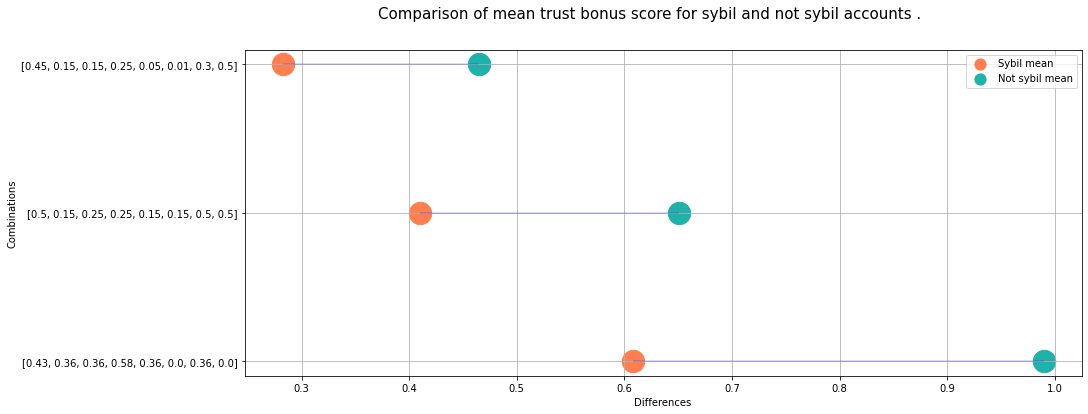

In [174]:
ordered_df = df5.sort_values(by=['Mean differences', 'Sybil mean'], ascending=False).head(10)
my_range=range(1,len(ordered_df.index)+1)

plt.figure(figsize=(15, 6))
plt.hlines(y=my_range, xmin=ordered_df['Sybil mean'], xmax=ordered_df['not_sybil mean'], color='blue', alpha=0.2, )
plt.scatter(ordered_df['Sybil mean'], my_range, color='coral', alpha=1, label='Sybil mean', s=500)
plt.scatter(ordered_df['not_sybil mean'], my_range, color='lightseagreen', alpha=1 , label='Not sybil mean', s=500)
plt.legend()

# Add title and axis names
plt.yticks(my_range, ordered_df['Combination of weights'])
plt.suptitle("Comparison of mean trust bonus score for sybil and not sybil accounts .", fontsize=15)
plt.xlabel('Differences')
plt.ylabel('Combinations')
plt.grid()
plt.legend(loc="upper right", markerscale=0.5)

plt.show()

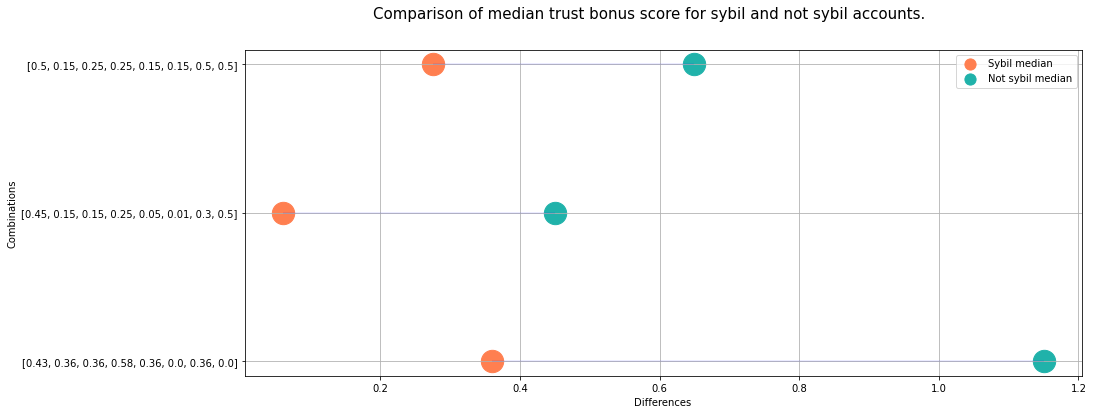

In [175]:
import matplotlib.pyplot as plt
ordered_df = df5.sort_values(by=['Median differences','Sybil median'], ascending=False).head(10)
my_range=range(1,len(ordered_df.index)+1)

plt.figure(figsize=(15, 6))
plt.hlines(y=my_range, xmin=ordered_df['Sybil median'], xmax=ordered_df['not_sybil median'], color='blue', alpha=0.1, )
plt.scatter(ordered_df['Sybil median'], my_range, color='coral', alpha=1, label='Sybil median', s=500)
plt.scatter(ordered_df['not_sybil median'], my_range, color='lightseagreen', alpha=1 , label='Not sybil median', s=500)
plt.legend()

# Add title and axis names
plt.yticks(my_range, ordered_df['Combination of weights'])
plt.suptitle("Comparison of median trust bonus score for sybil and not sybil accounts.", fontsize=15)
plt.xlabel('Differences')
plt.ylabel('Combinations')
plt.grid()
plt.legend(loc="upper right", markerscale=0.5)

plt.show()

## Paralellization and Tabu search 

In [55]:
combinations = []

for i in range(8):
    list_ = [0,0,0,0,0,0,0,0]
    list_[i] = int(100)
    combinations.append(list_)

In [56]:
for i in range(8):
    list_ = [0,0,0,0,0,0,0,0]
    if i < 7:
        list_[i], list_[i+1] = 100, 100
    else:
        list_[i], list_[0] = 100, 100
    
    combinations.append(list_)

In [57]:
for i in range(8):
    list_ = [0,0,0,0,0,0,0,0]
    if i < 6:
        list_[i], list_[i+1], list_[i + 2] = 100, 100, 100
    elif i == 6:
        list_[i], list_[i+1], list_[0] = 100, 100, 100
    
    else:
        list_[i], list_[0], list_[1]= 100, 100, 100
    
    combinations.append(list_)

In [58]:
for i in range(8):
    list_ = [0,0,0,0,0,0,0,0]
    if i < 5:
        list_[i], list_[i+1], list_[i + 2], list_[i + 3] = 100, 100, 100, 100
    elif i == 5:
        list_[i], list_[i+1], list_[i + 2], list_[0] = 100, 100, 100, 100
    
    elif i == 6:
        list_[i], list_[i + 1], list_[0],list_[1] = 100, 100, 100, 100
    else:
        list_[i], list_[0], list_[1], list_[2] = 100, 100, 100, 100
    
    combinations.append(list_)

In [61]:
for i in range(8):
    list_ = [0,0,0,0,0,0,0,0]
    if i < 4:
        list_[i], list_[i+1], list_[i + 2], list_[i + 3], list_[i + 4] = 100, 100, 100, 100, 100
    elif i == 4:
        list_[i], list_[i+1], list_[i + 2], list_[i + 3], list_[0] = 100, 100, 100, 100, 100
    
    elif i == 5:
        list_[i], list_[i + 1], list_[i + 2],list_[0], list_[1] = 100, 100, 100, 100, 100
    
    elif i == 6:
        list_[i], list_[i + 1], list_[0],list_[1], list_[2] = 100, 100, 100, 100, 100
    else:
        list_[i], list_[0], list_[1], list_[2], list_[3] = 100, 100, 100, 100, 100
    
    combinations.append(list_)

In [64]:
for i in range(8):
    list_ = [0,0,0,0,0,0,0,0]
    if i < 3:
        list_[i], list_[i+1], list_[i + 2], list_[i + 3], list_[i + 4], list_[i + 5] = 100, 100, 100, 100, 100, 100
    elif i == 3:
        list_[i], list_[i+1], list_[i + 2], list_[i + 3], list_[i + 4], list_[0] = 100, 100, 100, 100, 100, 100
    
    elif i == 4:
        list_[i], list_[i + 1], list_[i + 2],list_[i + 3], list_[0], list_[1] = 100, 100, 100, 100, 100, 100
    
    elif i == 5:
        list_[i], list_[i + 1], list_[i + 2],list_[0], list_[1], list_[2] = 100, 100, 100, 100, 100, 100
    
    elif i == 6:
        list_[i], list_[i + 1], list_[0],list_[1], list_[2], list_[3] = 100, 100, 100, 100, 100, 100
    else:
        list_[i], list_[0], list_[1], list_[2], list_[3], list_[4] = 100, 100, 100, 100, 100, 100
    
    combinations.append(list_)

In [66]:
for i in range(8):
    list_ = [0,0,0,0,0,0,0,0]
    if i < 2:
        list_[i], list_[i+1], list_[i + 2], list_[i + 3], list_[i + 4], list_[i + 5], list_[i + 6] = 100, 100, 100, 100, 100, 100, 100
        
    elif i == 2:
        list_[i], list_[i+1], list_[i + 2], list_[i + 3], list_[i + 4], list_[i + 5], list_[0] = 100, 100, 100, 100, 100, 100, 100
    
    elif i == 3:
        list_[i], list_[i + 1], list_[i + 2],list_[i + 3], list_[i + 4], list_[0], list_[1] = 100, 100, 100, 100, 100, 100, 100
    
    elif i == 4:
        list_[i], list_[i + 1], list_[i + 2],list_[i + 3], list_[0], list_[1], list_[2] = 100, 100, 100, 100, 100, 100, 100
    
    elif i == 5:
        list_[i], list_[i + 1], list_[i + 2],list_[0], list_[1], list_[2], list_[3] = 100, 100, 100, 100, 100, 100, 100
    
    elif i == 6:
        list_[i], list_[i + 1], list_[0],list_[1], list_[2], list_[3], list_[4] = 100, 100, 100, 100, 100, 100, 100
    else:
        list_[i], list_[0], list_[1], list_[2], list_[3], list_[4], list_[5] = 100, 100, 100, 100, 100, 100, 100
    
    combinations.append(list_)

In [67]:
combinations

[[100, 0, 0, 0, 0, 0, 0, 0],
 [0, 100, 0, 0, 0, 0, 0, 0],
 [0, 0, 100, 0, 0, 0, 0, 0],
 [0, 0, 0, 100, 0, 0, 0, 0],
 [0, 0, 0, 0, 100, 0, 0, 0],
 [0, 0, 0, 0, 0, 100, 0, 0],
 [0, 0, 0, 0, 0, 0, 100, 0],
 [0, 0, 0, 0, 0, 0, 0, 100],
 [100, 100, 0, 0, 0, 0, 0, 0],
 [0, 100, 100, 0, 0, 0, 0, 0],
 [0, 0, 100, 100, 0, 0, 0, 0],
 [0, 0, 0, 100, 100, 0, 0, 0],
 [0, 0, 0, 0, 100, 100, 0, 0],
 [0, 0, 0, 0, 0, 100, 100, 0],
 [0, 0, 0, 0, 0, 0, 100, 100],
 [100, 0, 0, 0, 0, 0, 0, 100],
 [100, 100, 100, 0, 0, 0, 0, 0],
 [0, 100, 100, 100, 0, 0, 0, 0],
 [0, 0, 100, 100, 100, 0, 0, 0],
 [0, 0, 0, 100, 100, 100, 0, 0],
 [0, 0, 0, 0, 100, 100, 100, 0],
 [0, 0, 0, 0, 0, 100, 100, 100],
 [100, 0, 0, 0, 0, 0, 100, 100],
 [100, 100, 0, 0, 0, 0, 0, 100],
 [100, 100, 100, 100, 0, 0, 0, 0],
 [0, 100, 100, 100, 100, 0, 0, 0],
 [0, 0, 100, 100, 100, 100, 0, 0],
 [0, 0, 0, 100, 100, 100, 100, 0],
 [0, 0, 0, 0, 100, 100, 100, 100],
 [100, 0, 0, 0, 0, 100, 100, 100],
 [100, 100, 0, 0, 0, 0, 100, 100],
 [100, 100,

In [68]:
combinations.append([100, 100, 100, 100, 100, 100, 100, 100])

In [69]:
combinations

[[100, 0, 0, 0, 0, 0, 0, 0],
 [0, 100, 0, 0, 0, 0, 0, 0],
 [0, 0, 100, 0, 0, 0, 0, 0],
 [0, 0, 0, 100, 0, 0, 0, 0],
 [0, 0, 0, 0, 100, 0, 0, 0],
 [0, 0, 0, 0, 0, 100, 0, 0],
 [0, 0, 0, 0, 0, 0, 100, 0],
 [0, 0, 0, 0, 0, 0, 0, 100],
 [100, 100, 0, 0, 0, 0, 0, 0],
 [0, 100, 100, 0, 0, 0, 0, 0],
 [0, 0, 100, 100, 0, 0, 0, 0],
 [0, 0, 0, 100, 100, 0, 0, 0],
 [0, 0, 0, 0, 100, 100, 0, 0],
 [0, 0, 0, 0, 0, 100, 100, 0],
 [0, 0, 0, 0, 0, 0, 100, 100],
 [100, 0, 0, 0, 0, 0, 0, 100],
 [100, 100, 100, 0, 0, 0, 0, 0],
 [0, 100, 100, 100, 0, 0, 0, 0],
 [0, 0, 100, 100, 100, 0, 0, 0],
 [0, 0, 0, 100, 100, 100, 0, 0],
 [0, 0, 0, 0, 100, 100, 100, 0],
 [0, 0, 0, 0, 0, 100, 100, 100],
 [100, 0, 0, 0, 0, 0, 100, 100],
 [100, 100, 0, 0, 0, 0, 0, 100],
 [100, 100, 100, 100, 0, 0, 0, 0],
 [0, 100, 100, 100, 100, 0, 0, 0],
 [0, 0, 100, 100, 100, 100, 0, 0],
 [0, 0, 0, 100, 100, 100, 100, 0],
 [0, 0, 0, 0, 100, 100, 100, 100],
 [100, 0, 0, 0, 0, 100, 100, 100],
 [100, 100, 0, 0, 0, 0, 100, 100],
 [100, 100,

## Charted

In [79]:
lower_values = []
l1 = np.arange(5, 40, 5)
l2 = np.arange(5, 40, 5)

for i in l1:
    lower_values.append(i)

for i in l2:
    lower_values.append(i)
    
big_values = np.arange(50, 80, 5)

In [ ]:
lower_values.insert()

In [111]:
import random
random.sample(list(big_values), 1)

[55]

In [114]:
def produce_weights(loc):
    
    WEIGHTS = random.sample(lower_values, 7)
    
    w1 = random.sample(list(big_values), 1)
    
    WEIGHTS.insert(loc, w1[0])
    
    return WEIGHTS

In [116]:
produce_weights(7)

[10, 35, 15, 20, 30, 15, 35, 60]

In [120]:
values = []

for j in range(8):
    i = 0
    while i < 25:
        np.random.seed(i)
        values.append(produce_weights(j))
        i += 1

In [121]:
values

[[50, 20, 15, 10, 25, 35, 5, 20],
 [65, 30, 5, 35, 20, 30, 5, 15],
 [50, 5, 25, 25, 15, 35, 15, 10],
 [70, 15, 30, 35, 25, 5, 30, 35],
 [75, 30, 35, 30, 10, 5, 20, 15],
 [65, 20, 5, 5, 35, 25, 15, 10],
 [75, 10, 35, 10, 5, 25, 30, 15],
 [65, 30, 25, 5, 15, 20, 10, 10],
 [50, 30, 5, 35, 15, 10, 10, 15],
 [65, 10, 25, 35, 35, 20, 5, 15],
 [50, 30, 30, 10, 15, 20, 5, 10],
 [75, 5, 30, 30, 15, 20, 35, 20],
 [50, 5, 10, 35, 35, 20, 10, 5],
 [55, 10, 35, 5, 20, 5, 10, 25],
 [75, 25, 15, 5, 35, 15, 5, 20],
 [55, 15, 20, 25, 30, 35, 5, 35],
 [55, 25, 35, 25, 5, 20, 15, 5],
 [65, 35, 15, 35, 20, 5, 5, 30],
 [70, 30, 10, 15, 20, 10, 25, 15],
 [50, 30, 30, 15, 10, 5, 10, 35],
 [50, 15, 20, 25, 30, 20, 15, 5],
 [55, 5, 15, 10, 5, 30, 30, 15],
 [65, 35, 25, 10, 20, 25, 15, 30],
 [75, 25, 25, 20, 35, 30, 20, 30],
 [50, 10, 25, 15, 20, 25, 30, 20],
 [5, 70, 20, 10, 20, 5, 30, 35],
 [35, 60, 35, 10, 5, 20, 25, 30],
 [25, 60, 35, 10, 25, 5, 15, 10],
 [5, 55, 15, 20, 35, 25, 20, 35],
 [20, 70, 15, 10, 5

In [122]:
import seaborn as sns

<AxesSubplot:>

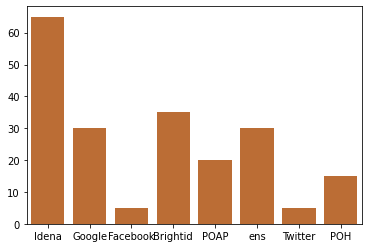

In [129]:
methods = ["Idena", "Google", "Facebook", "Brightid", "POAP", "ens", "Twitter", "POH"]

sns.barplot(methods, values[1], color="chocolate");

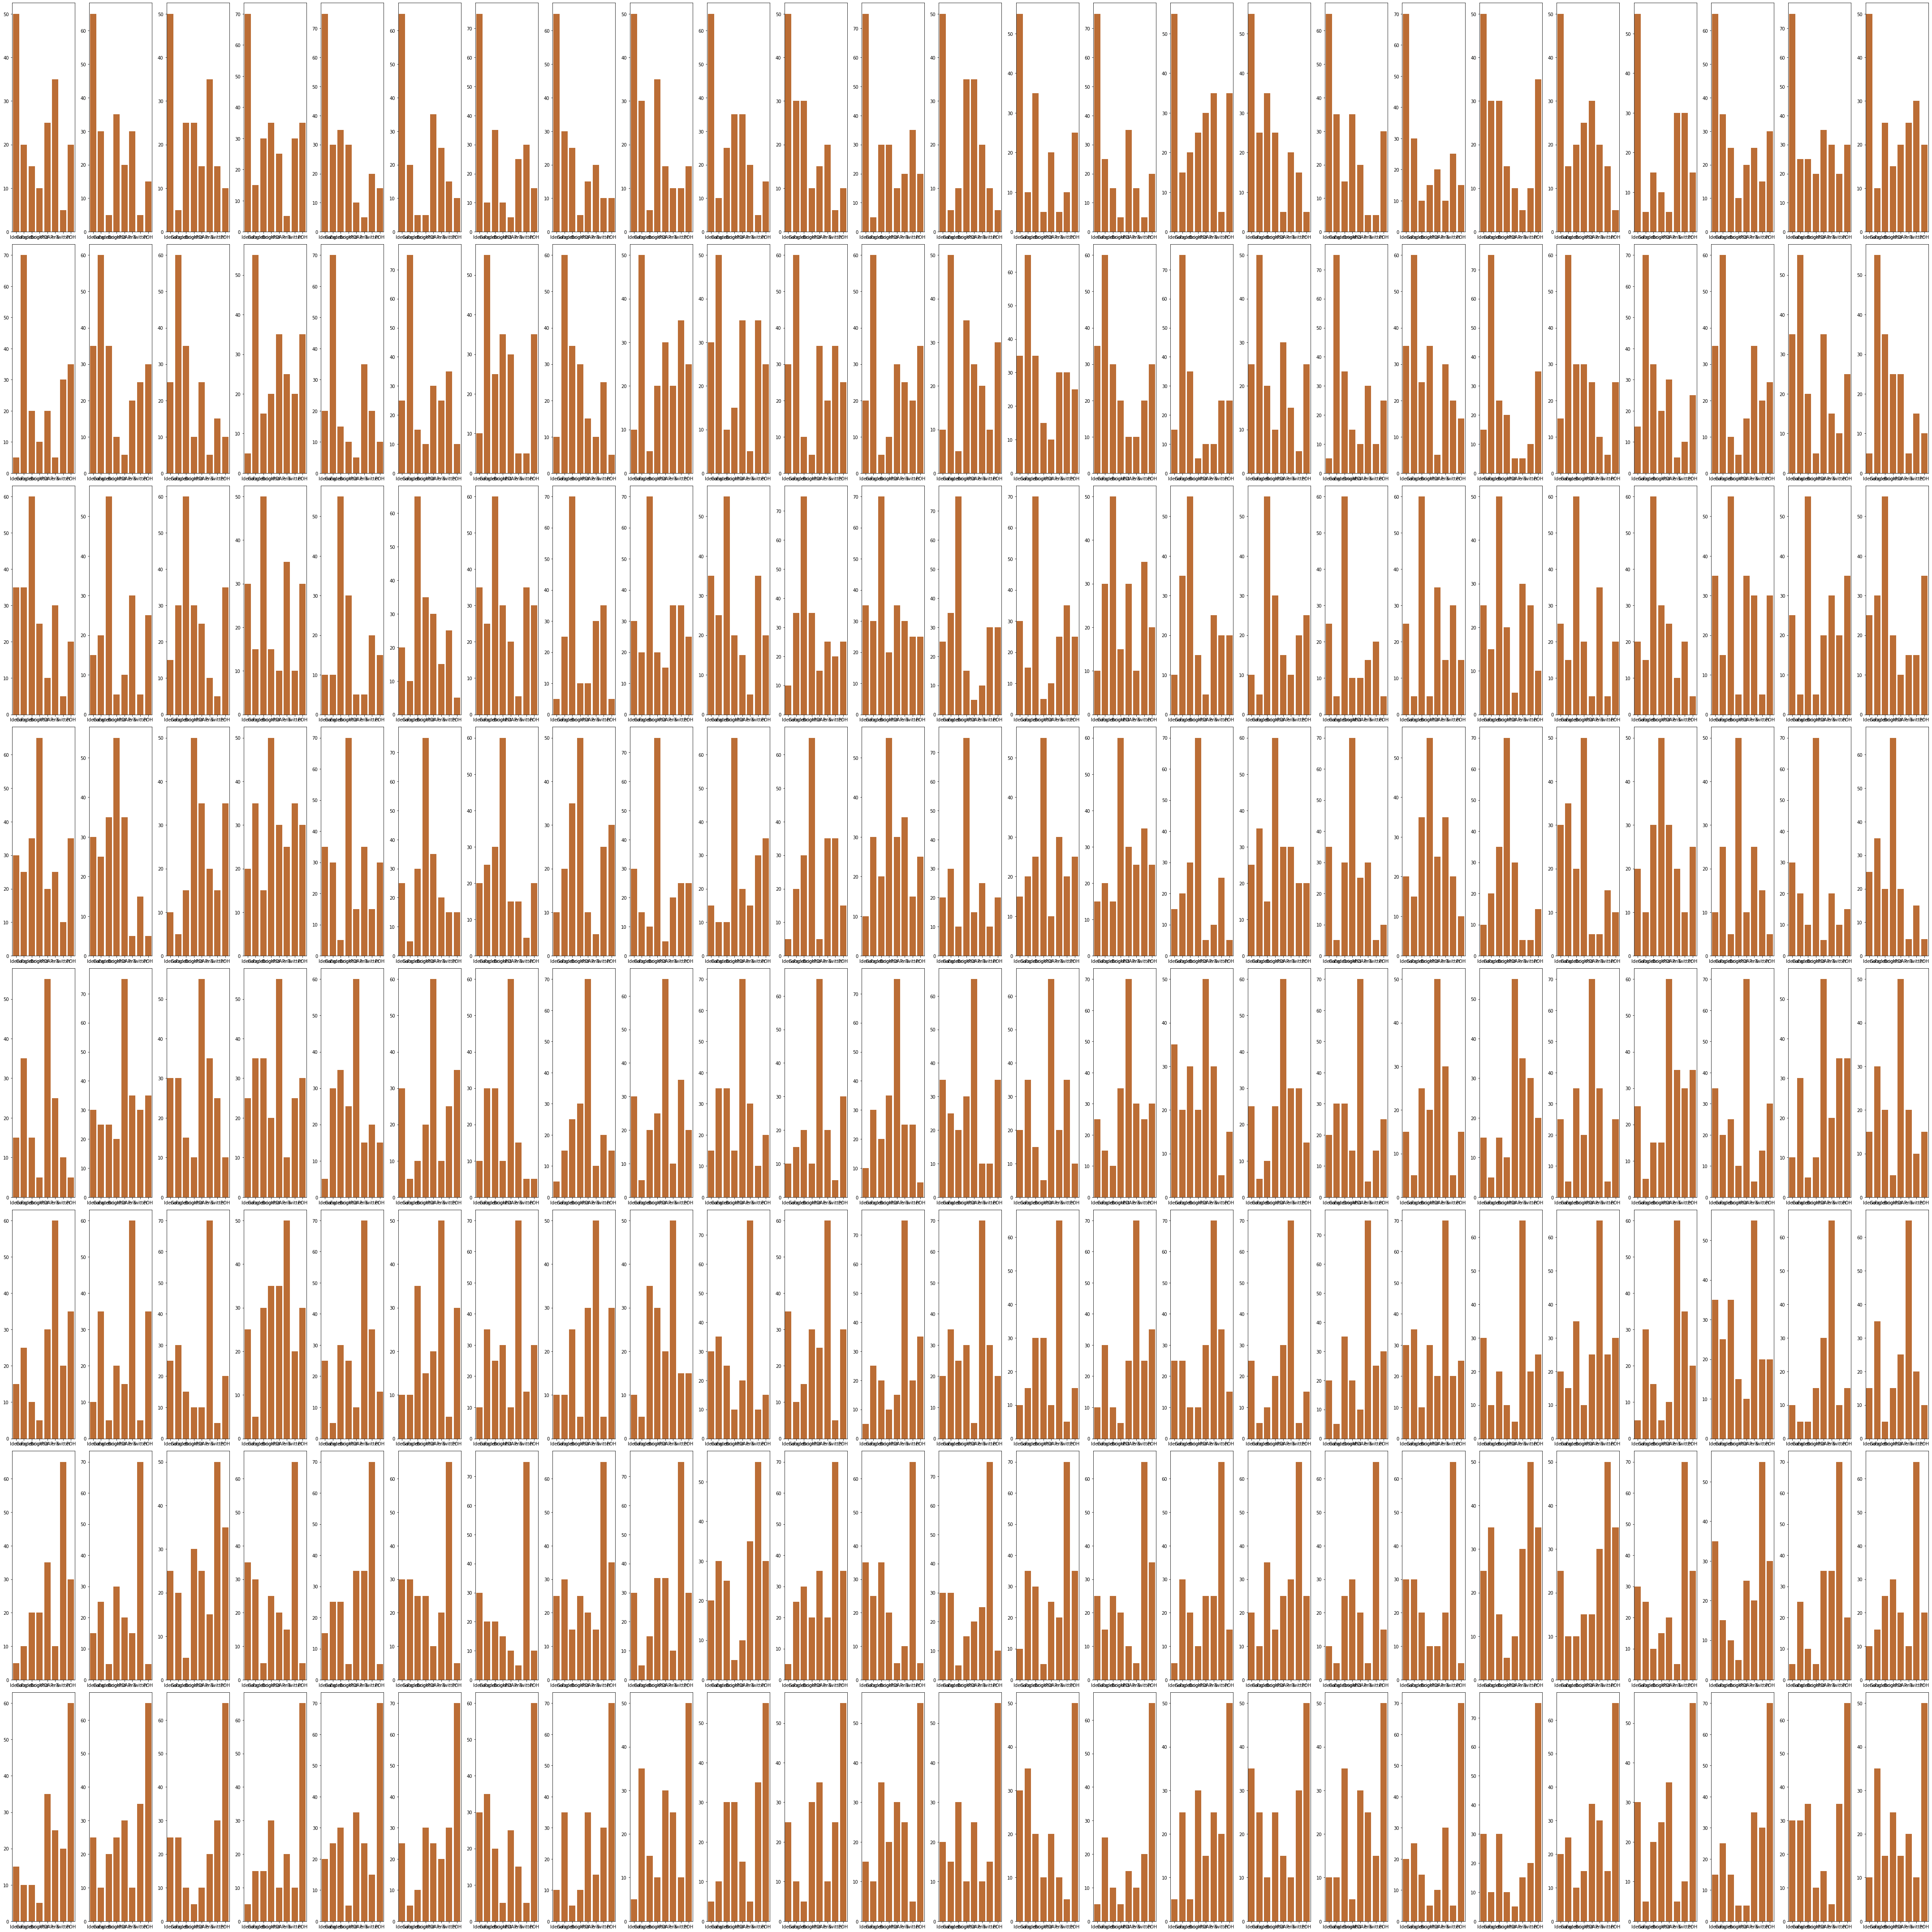

In [145]:
import matplotlib.pyplot as plt

plt.figure(figsize=(60, 60))


for i in range(len(values)):
    plt.subplot(8, 25, i+1)
    sns.barplot(methods, values[i], color="chocolate");
    plt.tight_layout()

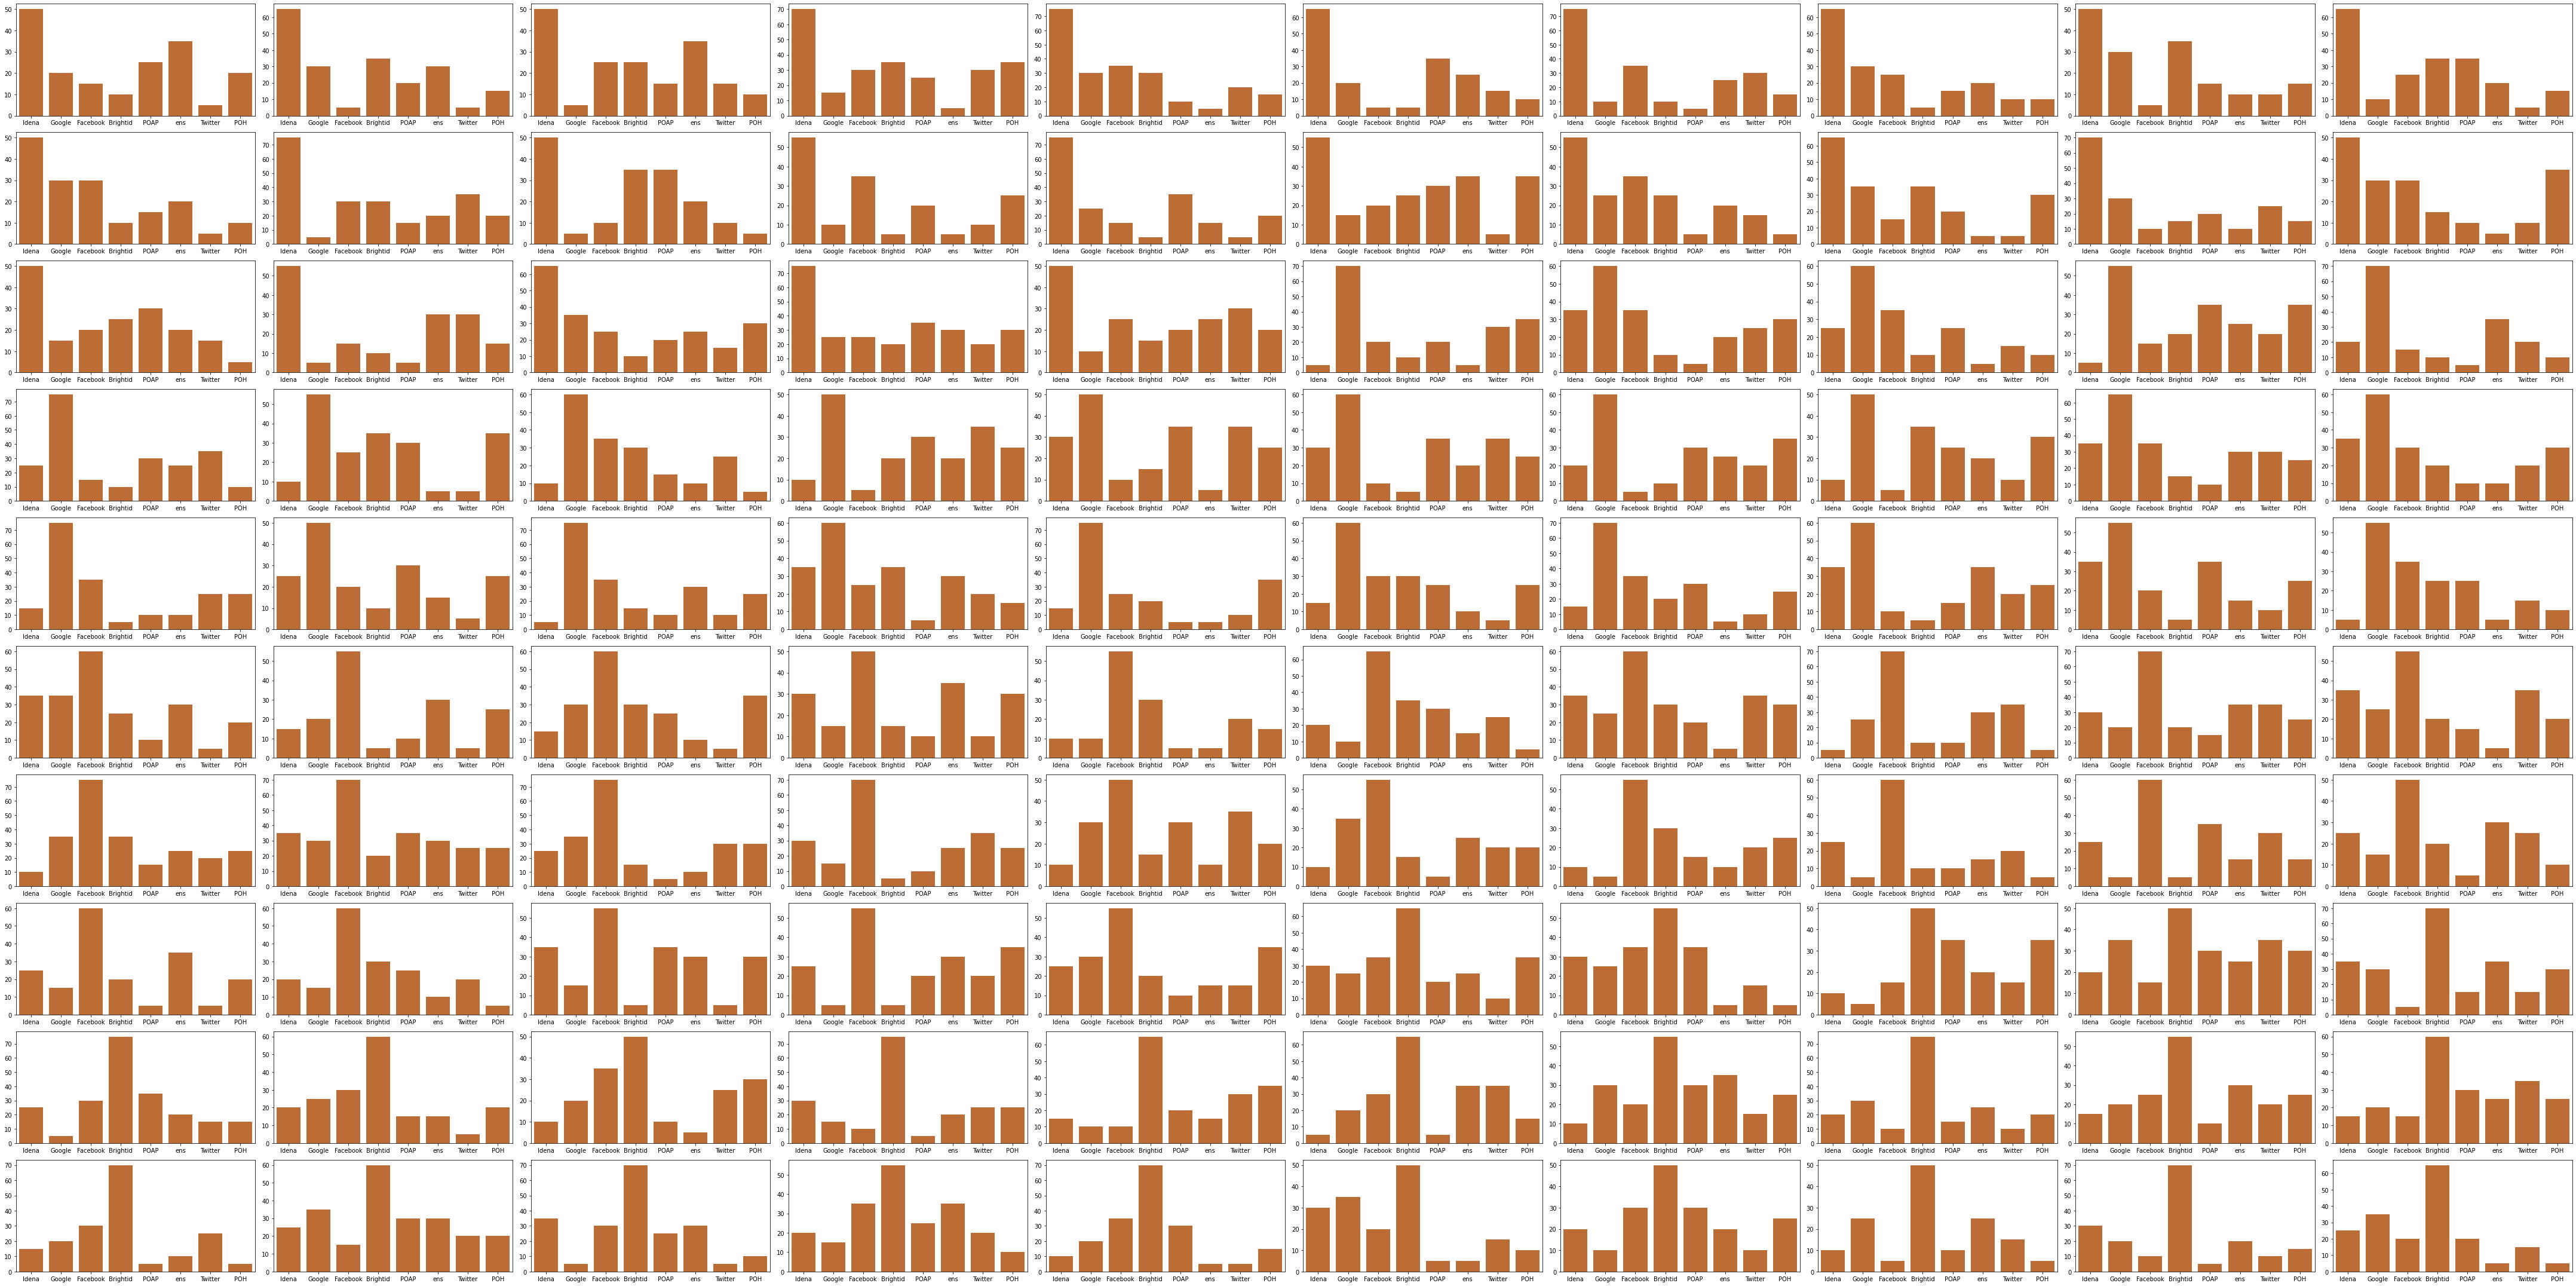

In [148]:
plt.figure(figsize=(60, 30))


for i in range(len(values[:100])):
    plt.subplot(10, 10, i+1)
    sns.barplot(methods, values[i], color="chocolate");
    plt.tight_layout()

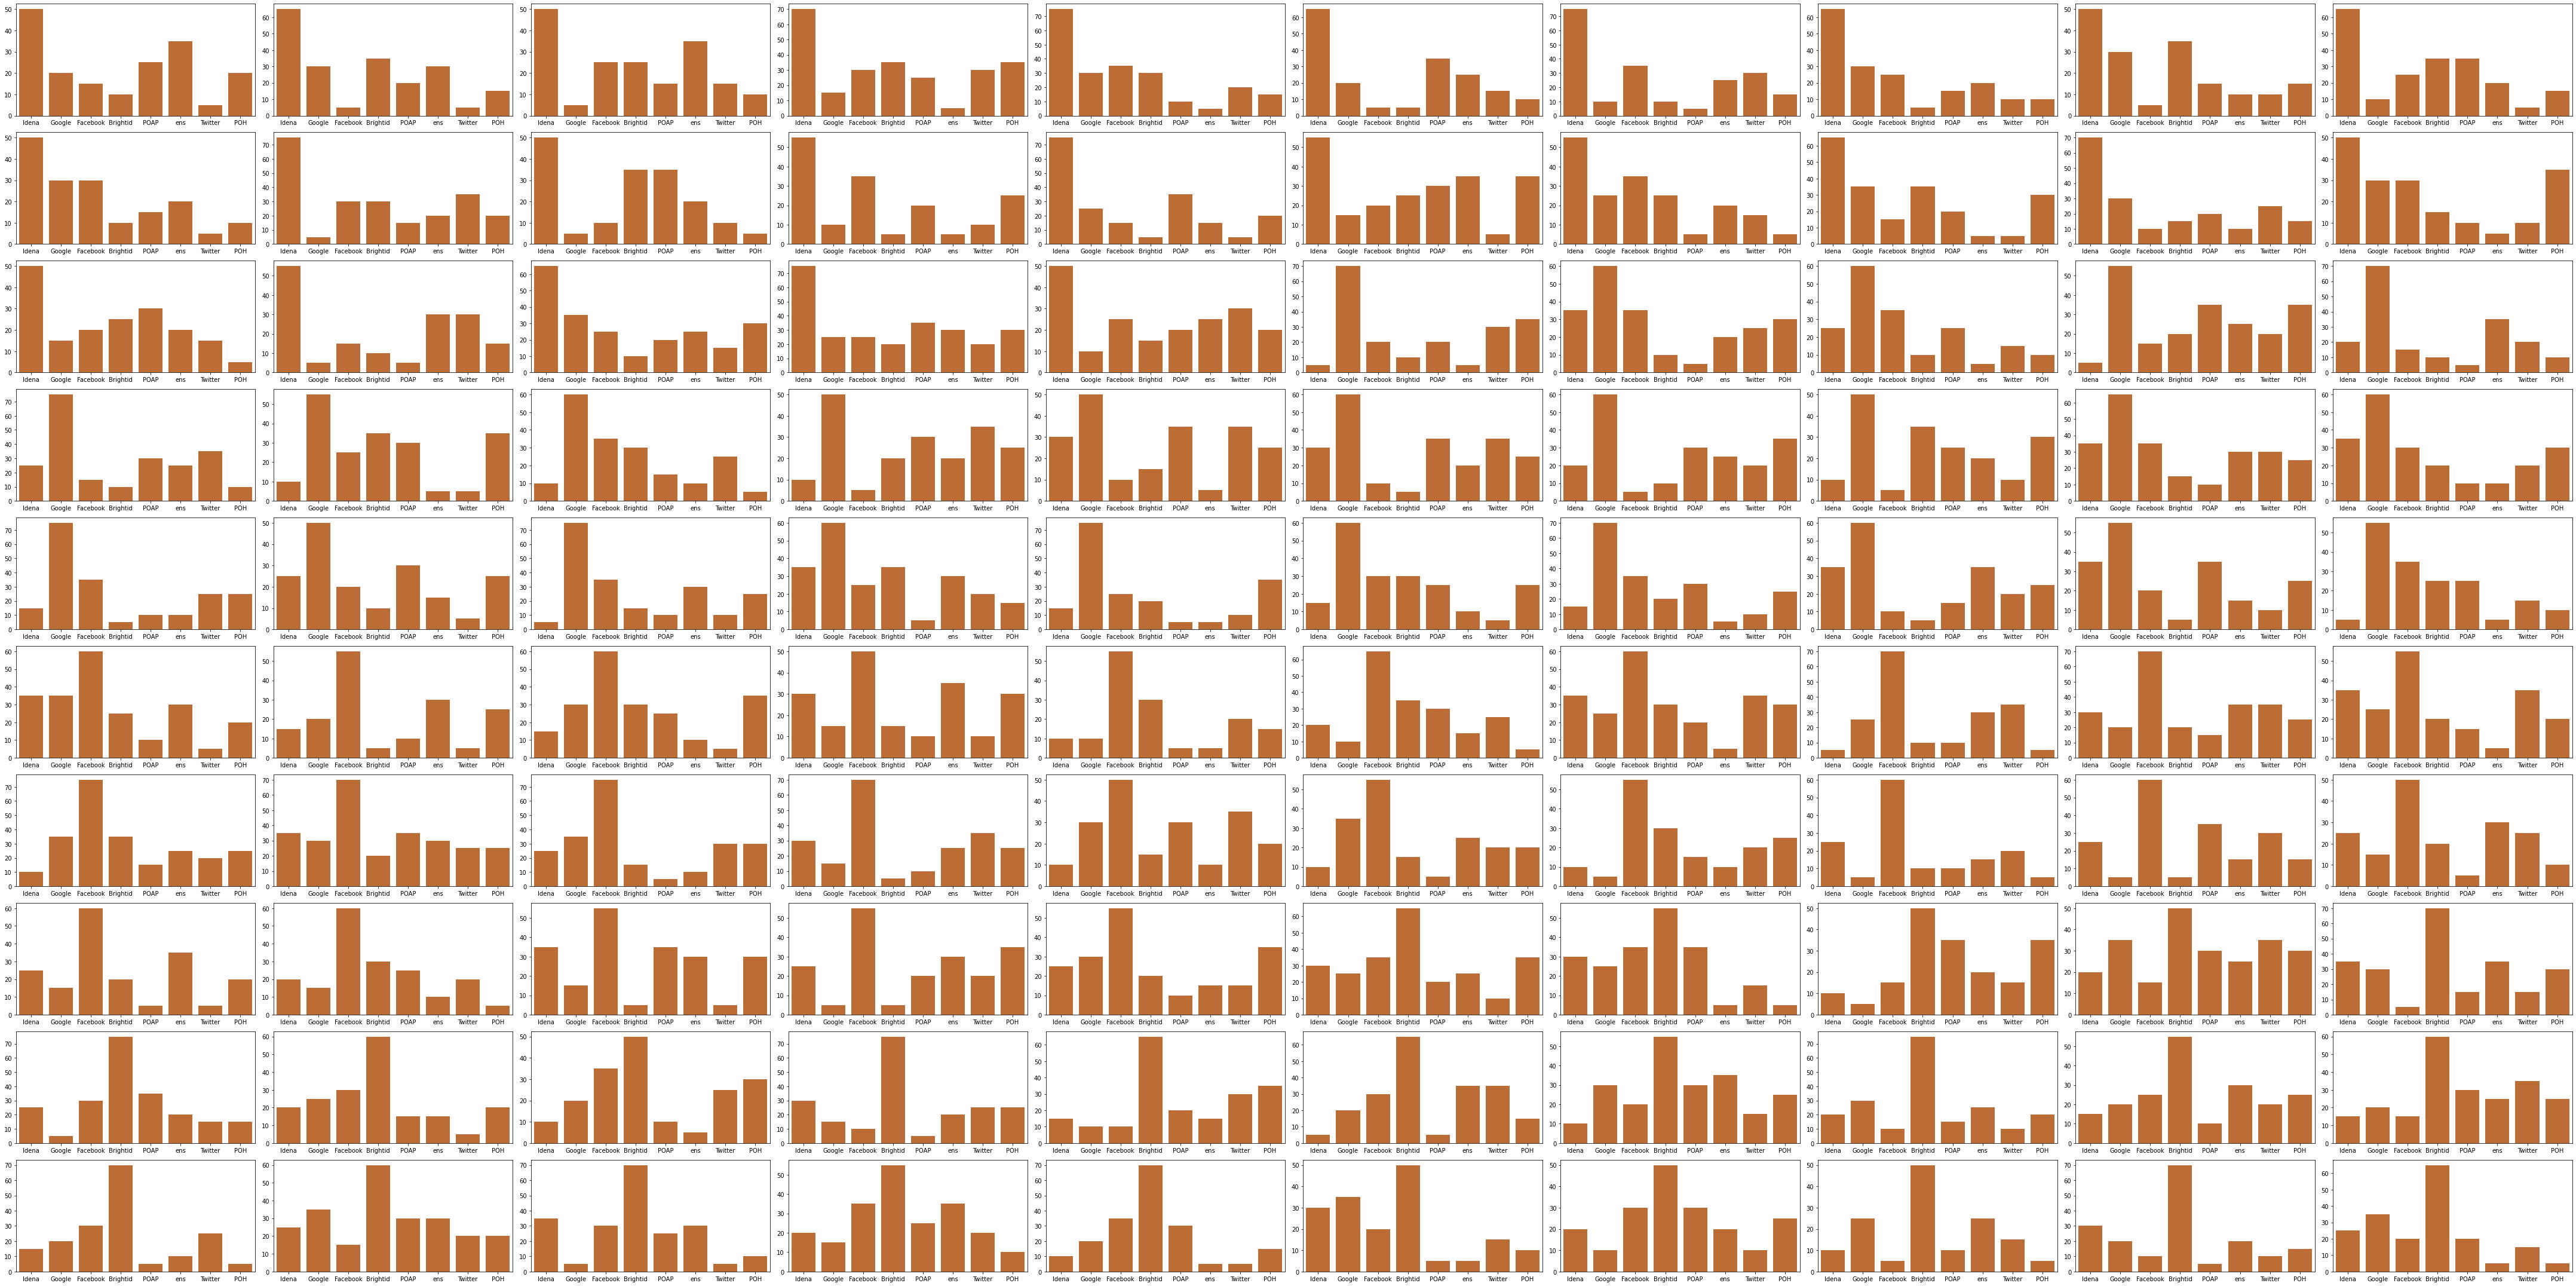

In [150]:
plt.figure(figsize=(60, 30))

for i in range(len(values[100:])):
    plt.subplot(10, 10, i+1)
    sns.barplot(methods, values[i], color="chocolate");
    plt.tight_layout()